Phân tích các yếu tố ảnh hưởng doanh thu toàn cầu của phim chiếu rạp (giai đoạn 2010-2020)

Nguồn: https://www.imdb.com/

| Tên thành viên | MSSV |
| --- | --- |
|Bùi Anh Khôi|19520649|
|Nguyễn Thị Thu Hà|19521456|
|Nguyễn Đình Quốc Bảo|19520402|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from ipywidgets import *
warnings.filterwarnings("ignore")

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

##

In [2]:
df = pd.read_csv('./data/data_preprocessed.csv')

# Thông tin sơ lược bộ dữ liệu sau khi xử lý

Thông tin

| STT | Tên thuộc tính | Mô tả | Kiểu |
| --- | --- | --- | --- |
|0|title|Tiêu đề phim|phân loại|
|1|casts|Diễn viên|phân loại|
|2|directors|Đạo diễn|phân loại|
|3|writers|Biên kịch|phân loại|
|4|genres|Các tổ hợp thể loại|phân loại|
|5|certificate|Chứng chỉ phân loại độ tuổi|phân loại|
|6|release_date|Thời điểm ra mắt (năm)|số|
|7|countries_of_origin|Quốc gia xuất sứ|phân loại|
|8|languages|Ngôn ngữ hỗ trợ|phân loại|
|9|production_companies|Hãng sản suất|phân loại|
|10|gross_worldwide|Doanh thu toàn cầu (đô la Mỹ)|số|
|11|budget|Kinh phí sản suất ước tính (đô la Mỹ)|số|
|12|runtime|Thời lượng phim (phút)|số|
|13|color|Màu phim|phân loại|
|14|sound_mix|Công nghệ âm thanh sử dụng trong phim|phân loại|
|15|aspect_ratio|Tỷ lệ khung hình|phân loại|
|16|score|Điểm đánh giá (trên thang 10)|số|
|17|votes|Số lượng người tham gia đánh giá|số|
|18|user_reviews|Số lượng bình luận của người dùng|số|
|19|critic_reviews|Số lượng bình luận của nhà phê bình|số|
|20|metascore|Điểm đánh giá của nhà phê bình|số|

Kiểu dữ liệu

In [4]:
df.dtypes

title                    object
casts                    object
directors                object
writers                  object
genres                   object
certificate              object
release_date            float64
countries_of_origin      object
languages                object
production_companies     object
gross_worldwide         float64
budget                  float64
runtime                 float64
color                    object
sound_mix                object
aspect_ratio             object
score                   float64
votes                   float64
user_reviews            float64
critic_reviews          float64
metascore               float64
dtype: object

Mô tả thống kê

In [5]:
df.describe()

release_date  gross_worldwide        budget      runtime         score  \
count  22165.000000     2.224500e+04  6.292000e+03  19985.00000  20294.000000   
mean    2015.450034     1.582416e+07  1.703714e+07    103.77373      5.920006   
std        3.046902     8.347394e+07  3.535144e+07     20.40872      1.141452   
min     2010.000000     2.000000e+00  2.591644e-03     45.00000      1.000000   
25%     2013.000000     3.640200e+04  1.160000e+06     90.00000      5.300000   
50%     2016.000000     3.589280e+05  4.200000e+06    100.00000      6.100000   
75%     2018.000000     3.059544e+06  1.500000e+07    113.00000      6.700000   
max     2021.000000     2.797501e+09  3.560000e+08    808.00000      9.400000   

              votes  user_reviews  critic_reviews    metascore  
count  22245.000000  22245.000000    22245.000000  5171.000000  
mean      14.290153     61.608092       37.784176    56.295301  
std       65.826653    264.532930       86.703250    17.166305  
min        0.000000      0.000000        0.000000     1.000000  
25%        0.103000      1.000000        0.000000    44.000000  
50%        0.545000      4.000000        5.000000    57.000000  
75%        3.100000     24.000000       28.000000    69.000000  
max     2200.000000  11100.000000     1000.000000   100.000000

Số lượng dữ liệu bị khuyết trên từng thuộc tính

In [6]:
df.isnull().sum()

title                       0
casts                    1746
directors                1705
writers                  2573
genres                   1774
certificate             13360
release_date               80
countries_of_origin      1186
languages                1378
production_companies     3352
gross_worldwide             0
budget                  15953
runtime                  2260
color                    2072
sound_mix               15911
aspect_ratio            10799
score                    1951
votes                       0
user_reviews                0
critic_reviews              0
metascore               17074
dtype: int64

Phần trăm dữ liệu bị khuyết sau khi đã drop bỏ các sample bị khuyết doanh thu

In [7]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
release_date             0.359631
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
gross_worldwide          0.000000
budget                  71.714992
runtime                 10.159586
color                    9.314453
sound_mix               71.526186
aspect_ratio            48.545741
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
dtype: float64

- Feature certificate, budget, metascore, aspect_ratio, sound_mix có tỷ lệ missing value khá lớn
- Feature votes - user_reviews - critic_reviews các missing value đã được điền khuyết với giá trị 0 (tương ứng với không có vote hoặc review)

# Basic EDA & Visualization
Các biến có ảnh hưởng
Genres,
Certificate,
Release Date,
Countries,
Languages,
Budget,
Votes

## Title

Top tự phim

In [8]:
def top_phim(top, TangDan):
    print(df.sort_values('gross_worldwide', ascending=TangDan)[['title', 'gross_worldwide']].head(top))
    
interact(top_phim, top = IntSlider(min=3, max=20), TangDan=[True, False])
pass

interactive(children=(IntSlider(value=3, description='top', max=20, min=3), Dropdown(description='TangDan', op…

In [9]:
def getList(feature):
    gs = df[feature]

    gs.dropna(inplace=True)

    gList = ''

    for g in gs:
        gList = gList + g

    gList = list(set(gList.split(',')))
    try:
        gList.remove('')
    except:
        pass
    return gList

## Genres

Số lượng tổ hợp thể loại phim

In [10]:
df['genres'].unique().shape[0]

1553

Có 1553 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên ta chỉ xét 50 tổ hợp có số phim lớn nhất.

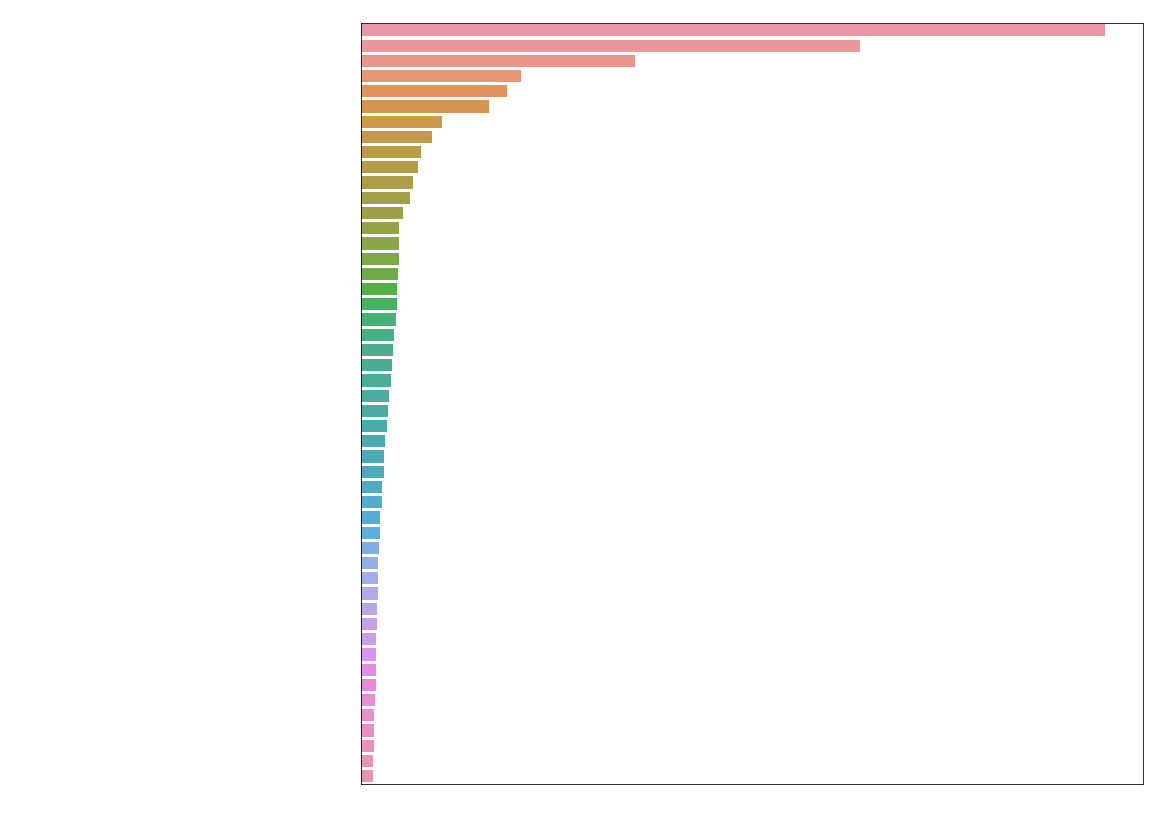

In [11]:
y = df.groupby("genres")['genres'].count().nlargest(50)
x = y.index 
 
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.barplot(x= y, y = x)
ax.set(title = 'Genres')
ax.set(xlabel = 'Quantity') 
ax.set(ylabel = '') 

plt.show()

- Thể loại drama/comedy là thể loại được sản xuất chủ yếu trong dataset (vị trí thứ 1 và 2)
- Phim với thể loại drama kết hợp comedy theo sau ở vị trí thứ 3.

=> Thể loại drama/comedy khá được ưu ái bởi các nhà sản xuất phim.

<?> Liệu khán giả có đón nhận những thể loại phim như thế này không? (Tính tổng doanh thu)


In [12]:
drama = comedy = dracome = 0
for i in range(len(df)):
    if df['genres'][i] == 'Drama,':
        drama += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,':
        comedy += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,Drama,':
        dracome += df['gross_worldwide'][i]

genres_gross = [drama, comedy, dracome]
for tl, dt in zip(['drama', 'comedy', 'drama, comedy'], genres_gross):
    print(tl, dt, '$')

drama 6298277722.0 $
comedy 14131645308.0 $
drama, comedy 7340333519.0 $


Thể loại riêng lẻ

In [13]:
genreList = getList('genres')
print(len(genreList), 'Gồm thể loại:')
for stt, genre in zip(range(0, len(genreList)), genreList):
    if stt+1 < 10:
        print(f"{stt+1}  {genre}")
    else:
        print(f"{stt+1} {genre}")

22 Gồm thể loại:
1  Reality-TV
2  Family
3  Action
4  News
5  Romance
6  Biography
7  Western
8  Animation
9  History
10 Mystery
11 Sci-Fi
12 Comedy
13 Crime
14 Horror
15 Drama
16 Music
17 Adventure
18 Thriller
19 Fantasy
20 Musical
21 War
22 Sport


Số lượng phim theo từng thể loại

Drama         11450
Comedy         7690
Thriller       3803
Romance        3487
Action         3078
Crime          2209
Adventure      1859
Horror         1804
Family         1656
Fantasy        1443
Mystery        1435
Animation      1159
Sci-Fi          981
Biography       875
History         839
Music           802
War             577
Sport           391
Musical         317
Western         122
News              2
Reality-TV        1
Name: genre, dtype: int64


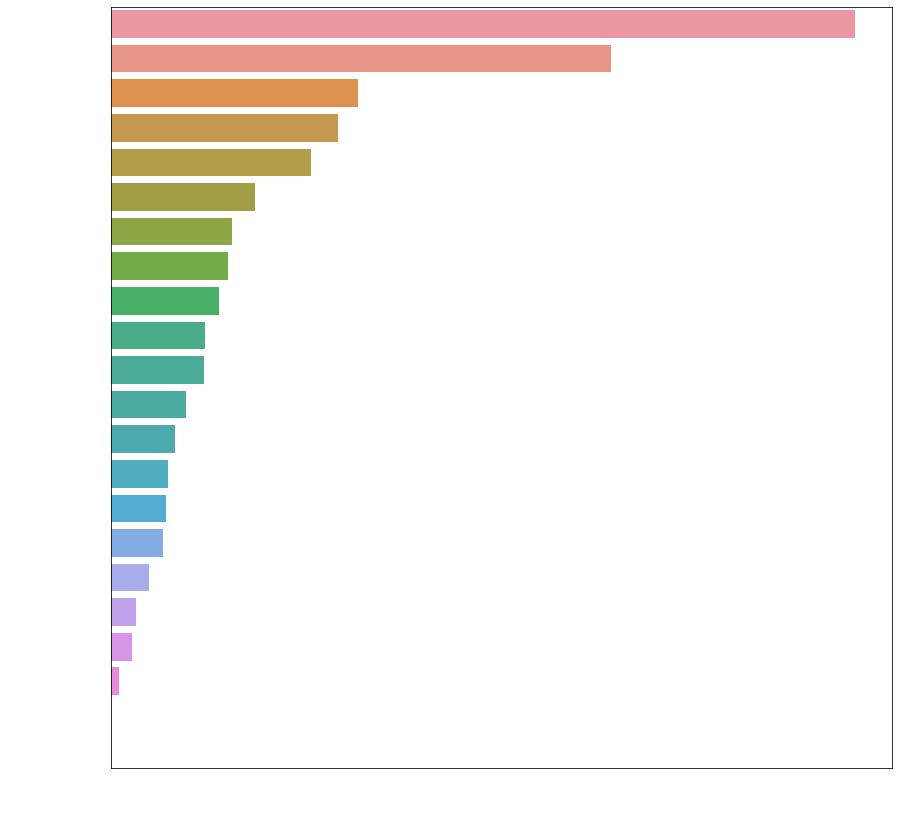

In [14]:
dataG = []
for genre in genreList:
    for line in df[df.genres.str.contains(genre, na=False)].values:
        dataG.append((line[0], genre, line[10], line[6], line[16]))  
dataG = pd.DataFrame(data=dataG, columns=['title', 'genre', 'gross', 'year', 'score'])
print(dataG.genre.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="genre",data=dataG, order=dataG.genre.value_counts().index[0:23])
plt.ylabel('Genres', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

Top 3 thể loại phổ biến nhất: Drama, Comedy và Thriller với số lượng phim lần lượt là 11450, 7690 và 3803 phim.

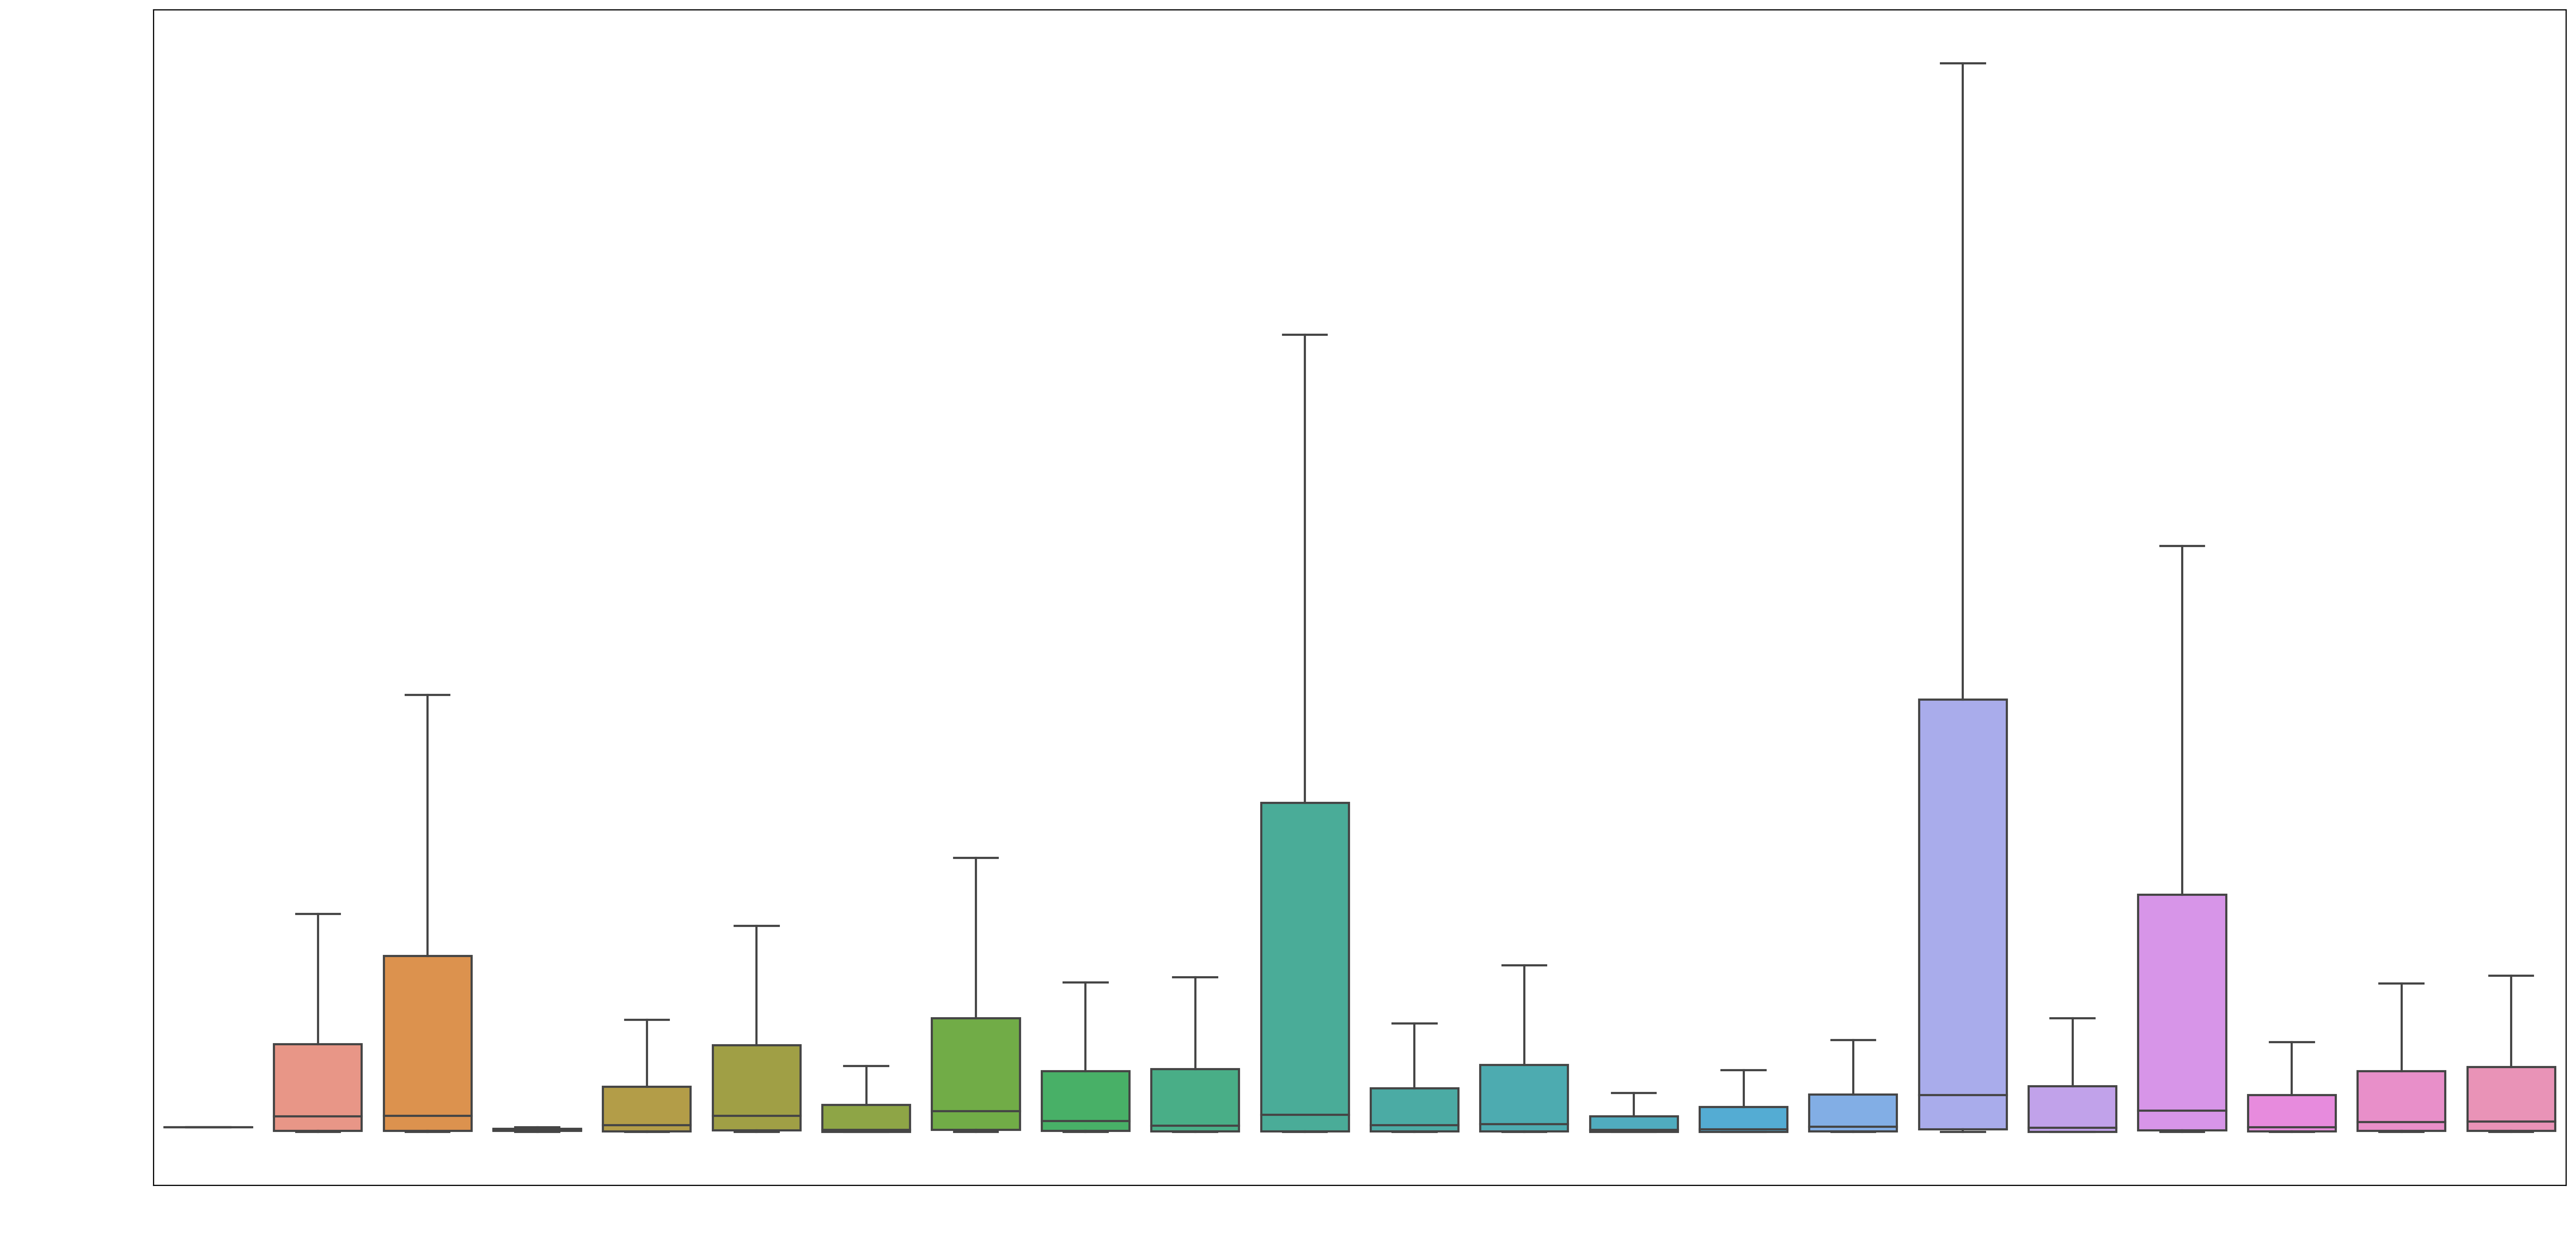

In [15]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.ticklabel_format(style='plain', axis='y')
fig.set_dpi(200)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.set_label_text(None, fontsize=20)   
ax.yaxis.set_label_text(None, fontsize=20)  
sns.boxplot(x='genre', y='gross', data=dataG, ax=ax, showfliers=False)
plt.show()

- Doanh thu phân bố không đều nhau giữa các thể loại.
- Các thể loại Adventure, Sci-Fi, Fantasy, Action có phân bố doanh thu trong các khoảng cao hơn các thể loại còn lại.

## Certificate

Số lượng chứng chỉ mỗi loại:
Unrated    2850
C13        2657
C16        1875
P           911
C18         592
Name: certificate, dtype: int64


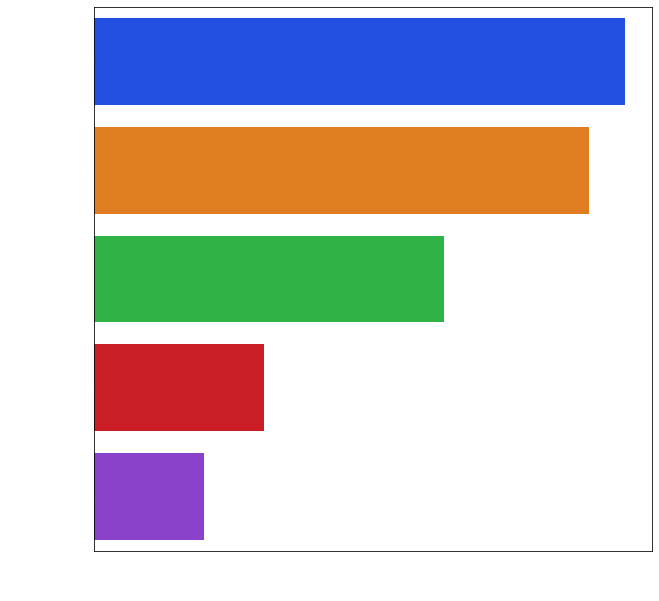

In [16]:
cert_size = df.groupby(['certificate'], dropna=False, as_index=False).size()
print('Số lượng chứng chỉ mỗi loại:') 
print(df.certificate.value_counts())
plt.figure(figsize=(10, 10))
sns.countplot(y="certificate",data=df, order=df.certificate.value_counts().index[0:5], palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng', fontsize=15)
plt.ylabel('Certificate', fontsize=15) 
plt.show()

Phân bố

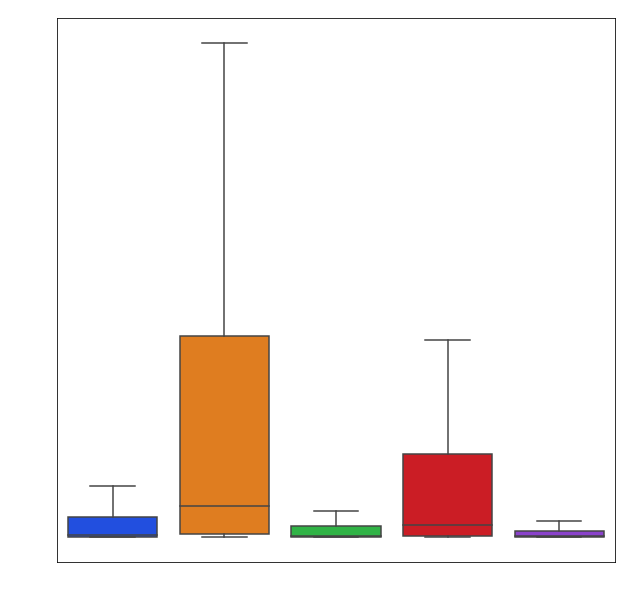

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['certificate'], y=df['gross_worldwide'], data=df, showfliers = False, palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Certificate', fontsize=15)
plt.ylabel('Gross', fontsize=15) 
plt.show()

- Phim với cert là C13 cho phân bố doanh thu lớn trong bộ dữ liệu.
- Trong khi đó phim với cert là P lại có phân bố doanh thu thấp hơn so với C13. 
(cert P là dành cho mọi lứa tuổi trong khi cert C13 là độ tuổi từ 13 trở lên)

## Release date

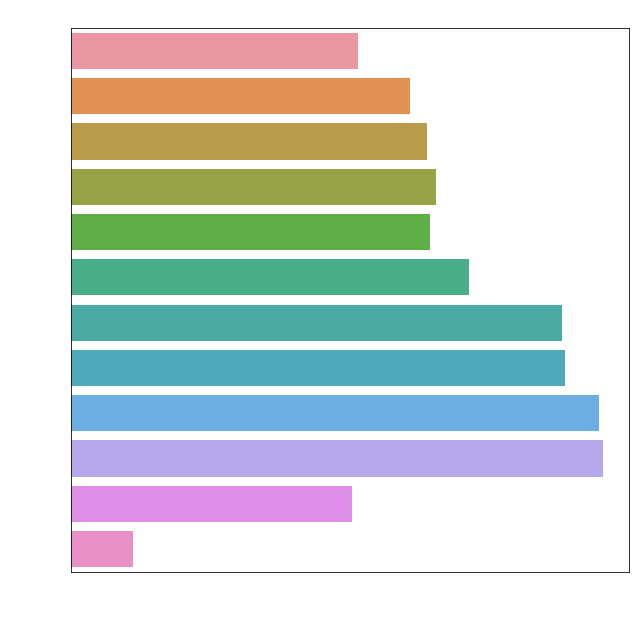

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(y="release_date",data=df, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.title('Yearly Analysis', fontsize= 20)
plt.ylabel('Year', fontsize=15) 
plt.show()

Nhận xét
- Số lượng phim tăng dần từ nằm 2010 - 2019
- Năm 2020 số lượng phim giảm mạnh có thể là do đại dịch

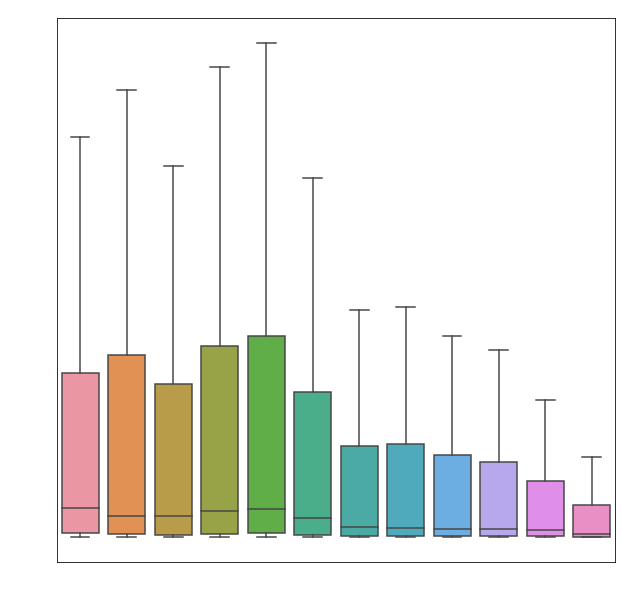

In [19]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Density', fontsize=15) 
plt.show()

*   Doanh thu trong khoảng thời gian [2010,2015] có sự phân bố khá là tương đồng và có sự giao động lớn.
*   Doanh thu trong khoảng thời gian [2016,2020] có sự phân bố khá là 
tương đồng và có xu hướng thấp hơn và ít giao động doanh thu của nhóm [2010,2015]. (Có thể là do giai đoạn này công nghệ đã phát triển, internet có khắp mọi nơi nên người xem không cần phải lên rạp mà có thể chờ có trên internet rồi coi để giảm chi phí nên doanh thu thấp hơn so với giai đoạn trước). 

## Countries

In [95]:
df.countries_of_origin.sample(1)

7620    United Kingdom,United States,
Name: countries_of_origin, dtype: object

In [20]:
cList = getList('countries_of_origin')
print(f'Đến từ {len(cList)} quốc gia:')
for stt, con in zip(range(0, len(cList)), cList):
    if stt+1 < 10:
        print(f"{stt+1}  {con}")
    else:
        print(f"{stt+1} {con}")

Đến từ 161 quốc gia:
1  Guatemala
2  Algeria
3  New Zealand
4  Switzerland
5  Lithuania
6  Iceland
7  Russia
8  South Africa
9  Brunei
10 Ecuador
11 Monaco
12 Paraguay
13 Italy
14 Panama
15 Congo
16 Georgia
17 The Democratic Republic of Congo
18 Kosovo
19 Singapore
20 Lebanon
21 Luxembourg
22 Iraq
23 Turkey
24 Iran
25 Spain
26 Cambodia
27 Mauritius
28 United Kingdom
29 Hungary
30 Poland
31 Dominica
32 Finland
33 Lesotho
34 Slovenia
35 Maldives
36 Greenland
37 Armenia
38 Ethiopia
39 Bulgaria
40 Israel
41 Australia
42 Tajikistan
43 United Arab Emirates
44 Cayman Islands
45 Somalia
46 Azerbaijan
47 Haiti
48 Ukraine
49 Colombia
50 Saudi Arabia
51 Qatar
52 Republic of Macedonia
53 Kyrgyzstan
54 Vanuatu
55 Venezuela
56 Bolivia
57 Nepal
58 Myanmar
59 Bahamas
60 Uzbekistan
61 Macao
62 Afghanistan
63 Taiwan
64 Chile
65 Cape Verde
66 New Caledonia
67 Germany
68 Liechtenstein
69 Philippines
70 Latvia
71 Namibia
72 Angola
73 Portugal
74 Netherlands Antilles
75 Egypt
76 Dominican Republic
77 Antarc

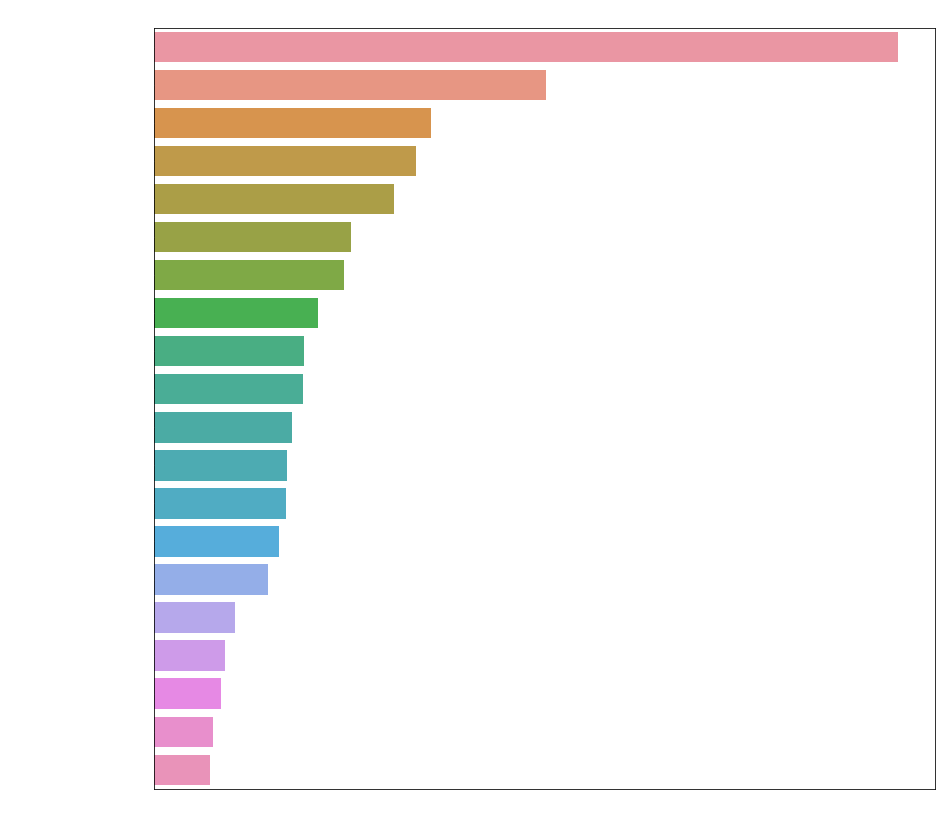

In [21]:
dataC = []
for con in cList:
    for line in df[df.countries_of_origin.str.contains(con, na=False)].values:
        dataC.append((line[0], con, line[10]))  
dataC = pd.DataFrame(data=dataC, columns=['title', 'country', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15) 
plt.title('Top 20 country', fontsize=20)
sns.countplot(y="country",data=dataC, order=dataC.country.value_counts().index[0:20])
plt.show()

Nhận xét 3 quốc gia tham gia sản xuất nhiều phim nhất là US, France và kế tiếp là India

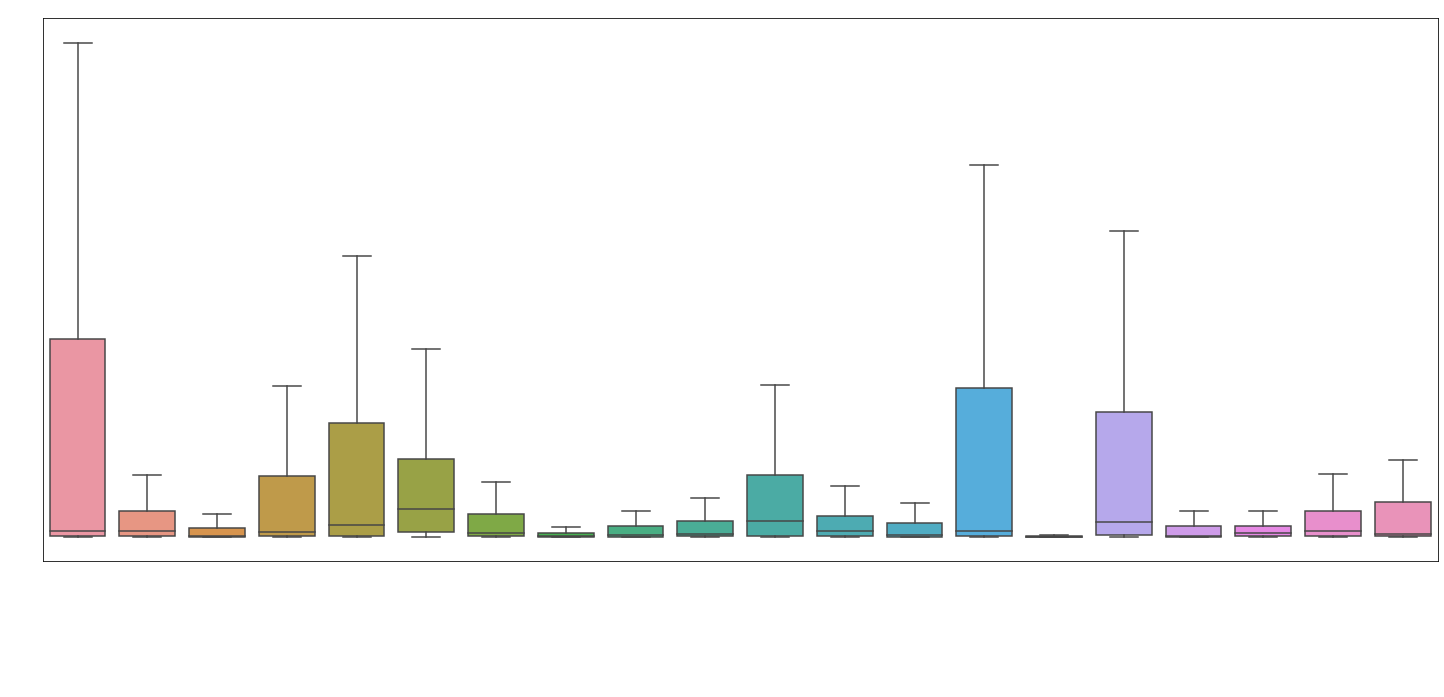

In [22]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=dataC["gross"], x=dataC.country,
            showfliers=False, order=dataC.country.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=50)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Nhận xét giữa các quốc gia có sự chênh lệch về  phân bố doanh thu

## Languages

In [87]:
df.languages.sample(1)

4458    German,Turkish,Romany,
Name: languages, dtype: object

In [23]:
lList = getList('languages')
print(f'Gồm {len(lList)} ngôn ngữ:')
for stt, lang in zip(range(0, len(lList)), lList):
    if stt+1 < 10:
        print(f"{stt+1}  {lang}")
    else:
        print(f"{stt+1} {lang}")

Gồm 228 ngôn ngữ:
1  Yakut
2  Berber languages
3  Dzongkha
4   Old
5  Welsh
6  Luxembourgish
7  Hassanya
8  Tagalog
9  Sindhi
10 Estonian
11 Gaelic
12 Kriolu
13 Songhay
14 Portuguese
15 Kodava
16 Ojibwa
17 Haryanvi
18 Nama
19 Sioux
20 Hawaiian
21 Assyrian Neo-Aramaic
22 North American Indian
23 Bhojpuri
24 Sumerian
25 Bonda
26 Ladino
27 Bulgarian
28 Slovenian
29 Scots
30 Mixtec
31 Swahili
32 Hokkien
33 Central Khmer
34 Indonesian
35 Nyanja
36 Romanian
37 Mandingo
38 Ukrainian Sign Language
39 Haitian
40 Norwegian
41 Ukrainian
42 Karen
43 Xhosa
44 Tibetan
45 Lithuanian
46 Urdu
47 Arabic
48 Tzotzil
49 Quechua
50 Mohawk
51 Danish
52 Yiddish
53 Kurdish
54 Tonga (Tonga Islands)
55 Sotho
56 Dinka
57 Thai
58 Australian Sign Language
59 Greek
60 Afrikaans
61 Macedonian
62 Hebrew
63 British Sign Language
64 Neapolitan
65 Sign Languages
66 Kazakh
67 Bable
68 Basque
69 Kannada
70 Navajo
71 Italian
72 Wolof
73 Romansh
74 Bosnian
75 Aboriginal
76 Ibo
77 Central American Indian languages
78 Chaozhou

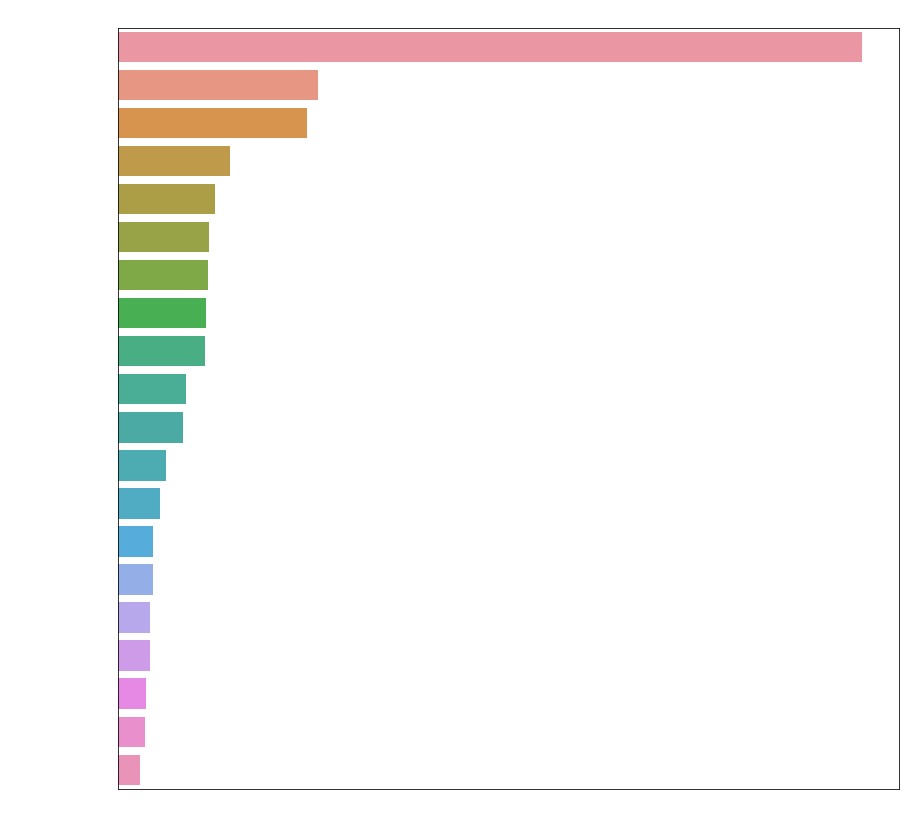

In [24]:
dataL = []
for lang in lList:
    for line in df[df.languages.str.contains(lang, na=False)].values:
        dataL.append((line[0], lang, line[10]))  
dataL = pd.DataFrame(data=dataL, columns=['title', 'language', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Languages', fontsize=15)
plt.title('Top 20 used languages', fontsize=20)
dataL.language.value_counts()
sns.countplot(y="language",data=dataL, order=dataL.language.value_counts().index[0:20])
plt.show()

Hầu hết các phim khi ra rạp đều có ngôn ngữ là tiếng Anh

In [25]:
def plot_lang(showFliers):
    plt.figure(figsize=(25, 10))
    sns.boxplot(y=dataL["gross"], x=dataL["language"],
                showfliers=showFliers, order=dataL.language.value_counts().index[0:20])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Languages', fontsize=15)
    plt.ylabel('Gross', fontsize=15)
    plt.show()

interact(plot_lang, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

- Có sự khác biệt về phân bố doanh thu giữa các loại ngôn ngữ
- Phim có hỗ trợ ngôn ngữ l2 Mandarin, Cantonese, Chinese, Korean, Janpanese có phân bố cao hơn

Số lượng ngôn ngữ ảnh hưởng như thế nào đến doanh thu phim

In [26]:
df_num = pd.DataFrame(dataL["title"].value_counts(
).rename_axis('title').reset_index(name='count'))

result = pd.merge(dataL, df_num, on="title").drop_duplicates(
    'title', keep='last').drop(columns=['language'])
print('Phim có nhiều ngôn ngữ nhất: ')
result[result['count'] == result['count'].max()][['title', 'count']]

Phim có nhiều ngôn ngữ nhất: 


title  count
61     Testing Movie1     18
1654  The Jungle Book     18

Phân bố của số lượng ngôn ngữ phim

In [27]:
result['count'].value_counts()

1     15243
2      3391
3      1203
4       468
5       180
6        68
7        23
8         8
9         5
18        2
11        2
10        1
Name: count, dtype: int64

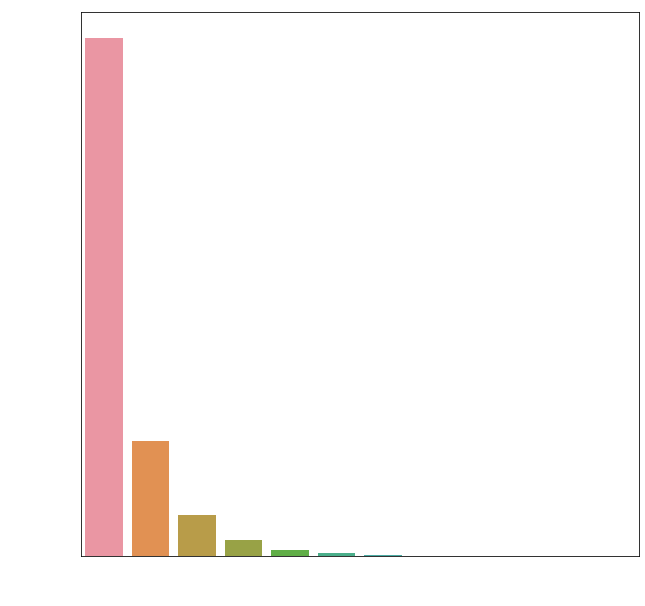

In [28]:
plt.figure(figsize=(10, 10))
sns.countplot(x='count', data=result)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng ngôn ngữ', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Nhận xét phần lớn là phim chỉ hỗ trợ một ngôn ngữ

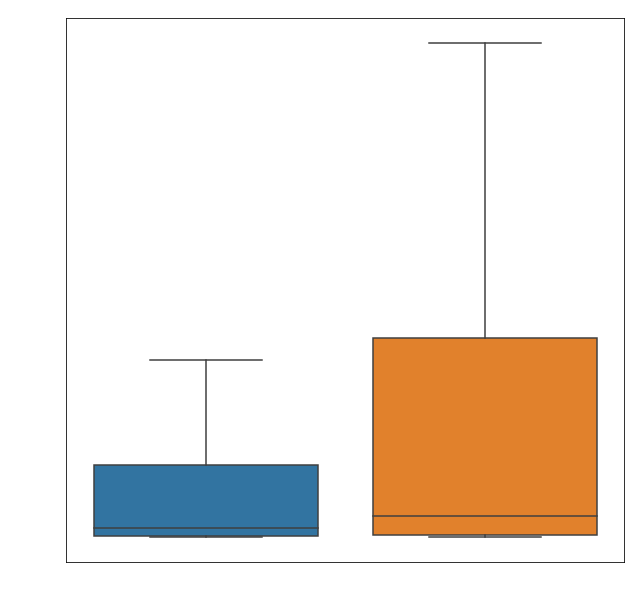

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=result["gross"], x=result['count'] > 1, showfliers=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Có nhiều hơn một ngôn ngữ?', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Việc nhiều hơn một 1 ngữ có thể ảnh hưởng đến doanh thu.

In [30]:
print('Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu:', result.corr()['gross']['count'])

Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu: 0.13345706118023848


=> Gần như không có sự tương quan

## Meta score

Regplot

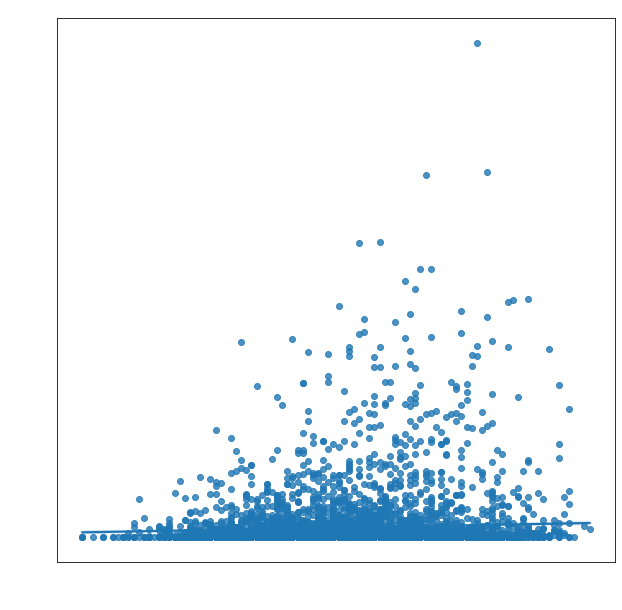

In [31]:
plt.figure(figsize=(10, 10)) 
sns.regplot(x='metascore', y='gross_worldwide', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Metascore', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [32]:
df.corr()['gross_worldwide']['metascore']

0.05572804049631602

## Runtime

In [33]:
print('- Phim có thời lượng lớn nhất:', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .max()].to_string(index=False, header=False))
print('- Phim có thời lượng nhỏ nhất nhất:\n', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .min()].to_string(index=False, header=False))
print('- Thời lượng phim trung bình:', df['runtime'].mean())
print('- Thời lượng phim trung vị:', df['runtime'].median()) 

- Phim có thời lượng lớn nhất: La flor 808.0
- Phim có thời lượng nhỏ nhất nhất:
 Ernest et Célestine en hiver 45.0
                   Cassandra 45.0
        Qing zhou shan shang 45.0
                     45 Days 45.0
    MULT v kino. Vypusk # 16 45.0
                 Free Spirit 45.0
- Thời lượng phim trung bình: 103.77373029772329
- Thời lượng phim trung vị: 100.0


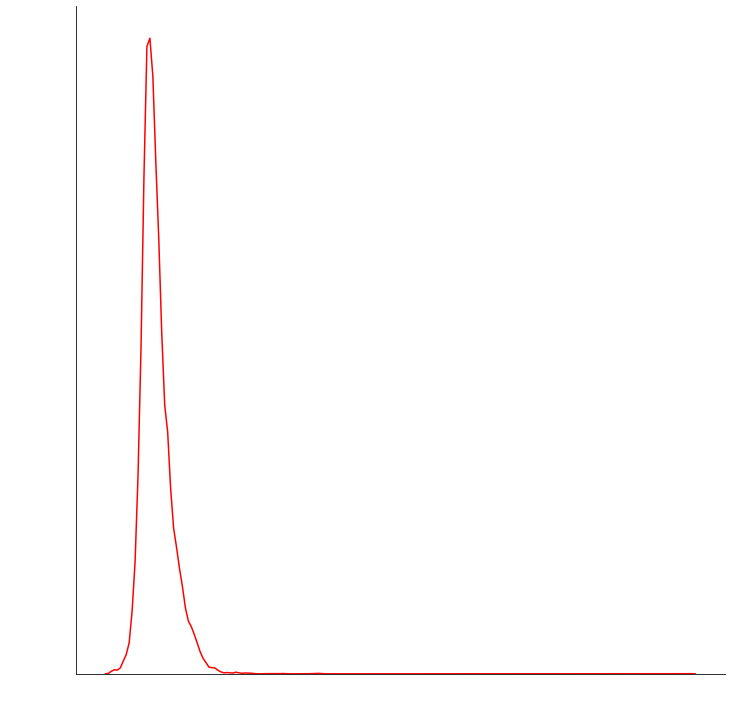

In [34]:
sns.displot(x='runtime', data=df, kind="kde", height=10 , aspect = 1, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [35]:
def rt_plot(showfliers):
    plt.figure(figsize=(10, 10)) 
    sns.boxplot(x='runtime', data=df, showfliers=showfliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Runtime', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()
    
interact(rt_plot, showfliers=[False, True])
pass

interactive(children=(Dropdown(description='showfliers', options=(False, True), value=False), Output()), _dom_…

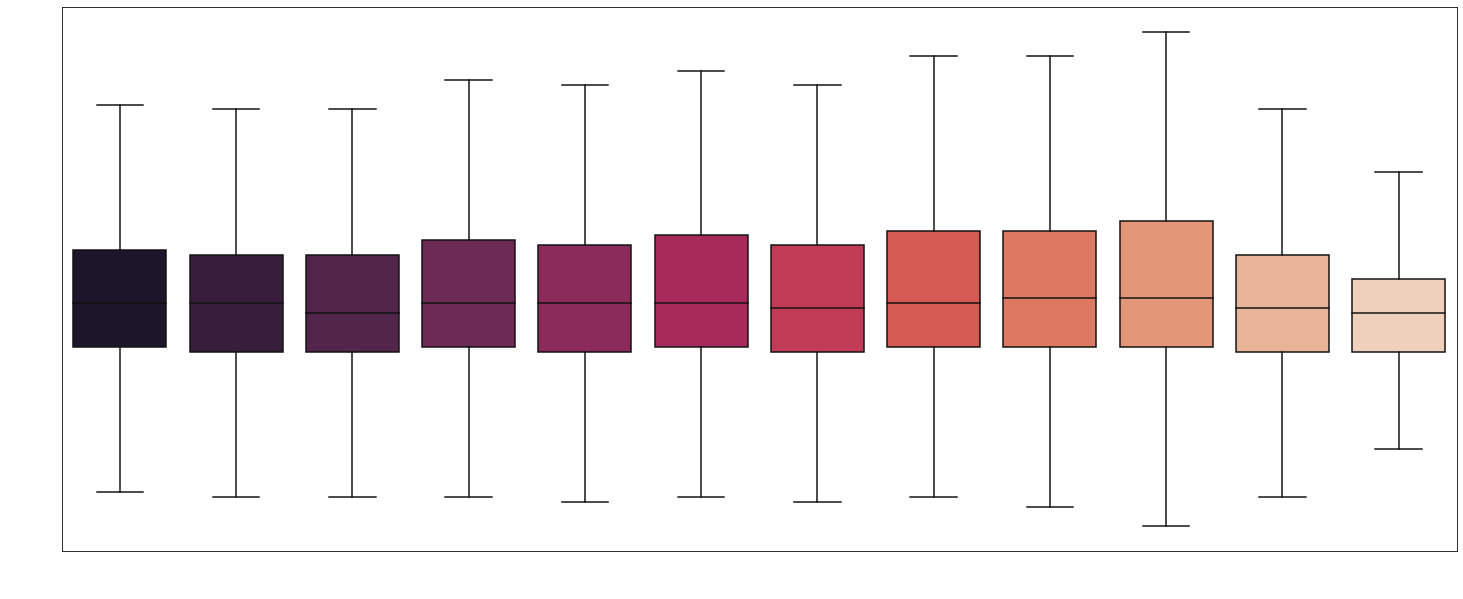

In [36]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=df['runtime'], x=df['release_date'], data=df, showfliers = False, palette='rocket')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim trong 10 năm không có quá nhiều sự thay đổi, tuy nhiên vào năm 2019 thì phim có thời lượng cao hơn tương đối so với những năm còn lại.

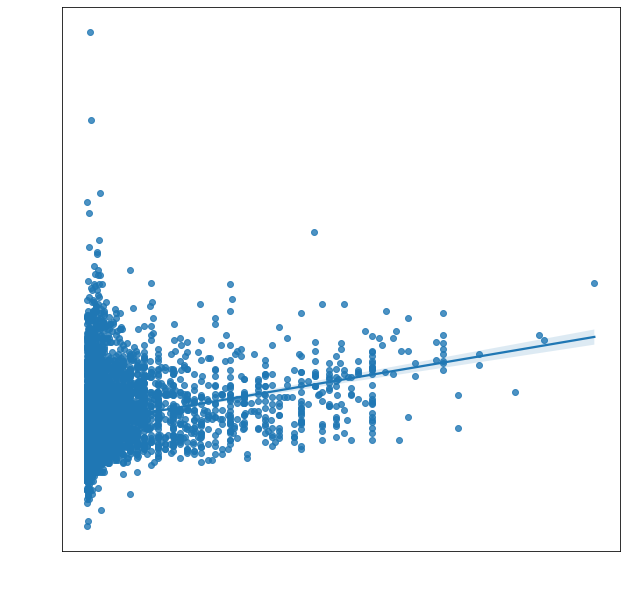

In [37]:
plt.figure(figsize=(10, 10))
sns.regplot(y="runtime", x="budget", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim có quan hệ với chi phí đầu tư vào phim khi ta thấy rằng:
- Phim với sự đầu tư càng lớn thì thời lượng càng cao: Đòi hỏi chi phí cho các phân cảnh quay, hậu kì nhiều hơn.
- Phương sai (runtime) của phim với chi phí thấp thì cao và giảm dần khi chi phí tăng.

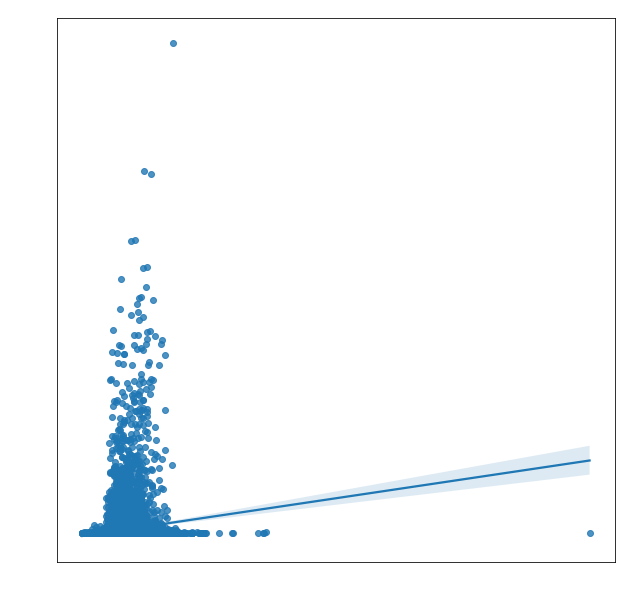

In [38]:
plt.figure(figsize=(10, 10)) 
sns.regplot(y="gross_worldwide", x="runtime", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [39]:
df.corr()['gross_worldwide']['runtime']

0.13109052508076918

=> Gần như không có sự tương quan

## Budget
https://www.xe.com/currencyconverter/

Regplot

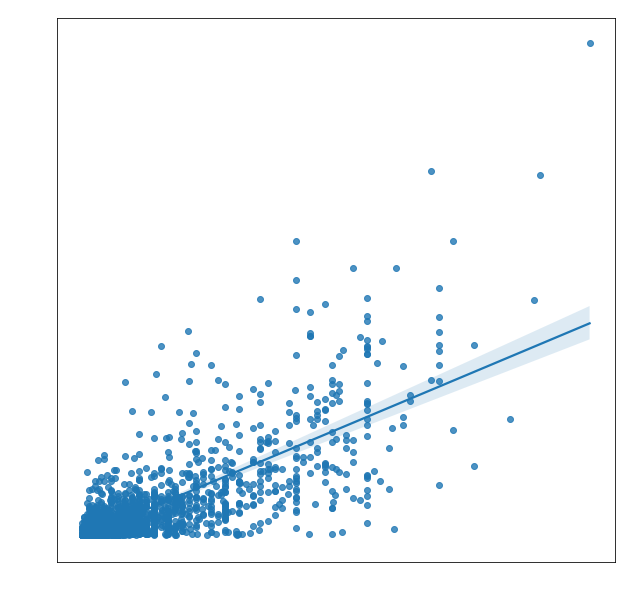

In [40]:
plt.figure(figsize=(10, 10))
sns.regplot(x="budget", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Đồ thi cho thấy tương quan giữa budget và gross_worldwide là lớn. Ta đi tính correlation giữa 2 thuộc tính.

In [41]:
df.corr()['gross_worldwide']['budget']

0.8016273900516061

Kết quả trả về là 0.8016273900516061. Đây là mức tương quan đồng thuận mạnh đúng như dự đoán.

## Aspect Ratio

Số lượng loại

In [42]:
df['aspect_ratio'].value_counts().shape[0]

53

In [43]:
df['aspect_ratio'].value_counts()

2.35:1         5798
1.85:1         2797
2.39:1         1595
1.78:1          816
1.66:1          101
1.33:1           72
2.00:1           53
1.37:1           39
2.40:1           23
2:1              22
2.66:1           22
2.20:1           16
1.90:1           14
2.55:1            8
2.4:1             7
1.50:1            5
2.76:1            5
2:39              5
1:1               4
1.55:1            4
cinemascope       3
2.11:1            2
1.89:1            2
2.25:1            2
3:1               2
2.10:1            2
2.41:1            1
1.95:1            1
1.77:1            1
1:66              1
2.37:1            1
1.61:1            1
circular          1
1.00:1            1
1.56:1            1
2.22:1            1
1.20:1            1
2.2:1             1
tondoscope        1
2.16:1            1
1:1.85            1
2.21:1            1
3.66:1            1
1.40:1            1
2.38:1            1
3.2:1             1
2.77:1            1
2.80:1            1
2.12:1            1
1.90.1            1


circular

In [44]:
df[df.aspect_ratio=='circular']['title']

16091    Wo bu shi Pan Jin Lian
Name: title, dtype: object

https://www.imdb.com/title/tt5918090/mediaindex/?ref_=tt_mi_sm

tondoscope

In [45]:
df[df.aspect_ratio=='tondoscope'][['title', 'countries_of_origin']]


title countries_of_origin
5671  Lucifer     Mexico,Belgium,

https://www.imdb.com/title/tt4131206/mediaindex/?ref_=tt_mi_sm

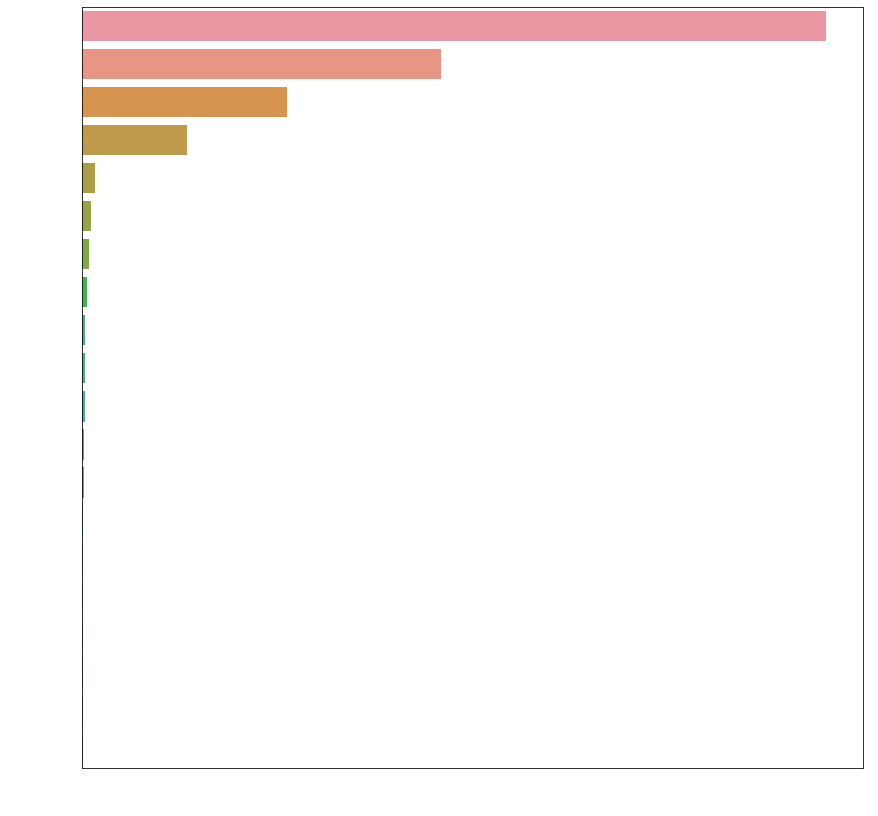

In [46]:
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('AR', fontsize=15) 
sns.countplot(y="aspect_ratio",data=df, order=df.aspect_ratio.value_counts().index[0:20])
plt.show()

Regplot

In [47]:
def ar_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Country', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["aspect_ratio"],
                showfliers=showFliers, order=df.aspect_ratio.value_counts().index[0:20])
    plt.show()
    
interact(ar_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim sử dụng tỷ lệ khung hình là 2.55

In [48]:
df[df.aspect_ratio == '2.55:1'][['title', 'gross_worldwide']]

title  gross_worldwide
208                    La La Land      448906865.0
5185                Hou hui wu qi      100125957.0
18685  Feng kuang de wai xing ren      327598891.0
18971               My Father Die           4252.0
20176           Fei chi ren sheng      255863112.0
21439             Liu lang di qiu      699992512.0
21976     Aimer, boire et chanter        2423379.0
22038                    Viktoria          11314.0

## Score

Phân bố 

In [49]:
def score_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.score,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Score', fontsize=15)
    plt.show()



interact(score_box_plot, showFliers=[True, False])
pass

interactive(children=(Dropdown(description='showFliers', options=(True, False), value=True), Output()), _dom_c…

Regplot

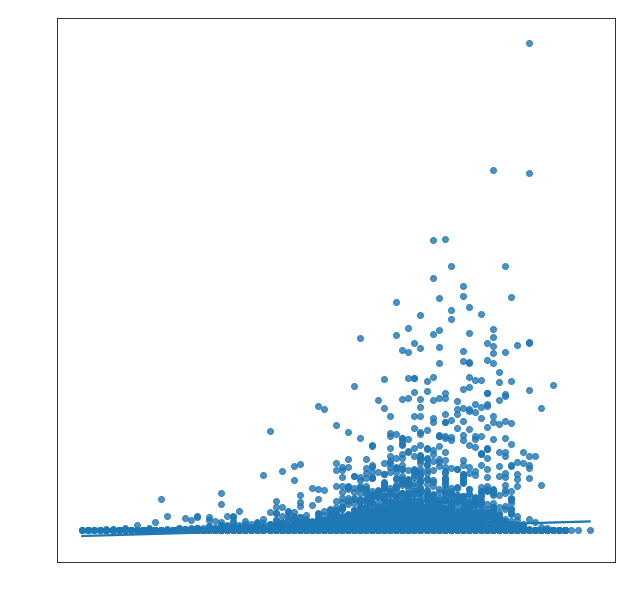

In [50]:
plt.figure(figsize=(10, 10))
sns.regplot(x="score", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [51]:
df.corr()['gross_worldwide']['score']

0.1296968109051146

## Votes (nghìn người)

In [52]:
def vote_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.votes,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Votes', fontsize=15)
    plt.show()



interact(vote_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có số điểm đánh giá cao nhất

In [53]:
df[df.score == df.score.max()]

title                                   casts  \
3643  Amudhan aka Sinamkol  Aravindhan,Sinthar Athith,Leelawathy,,   

            directors         writers  genres certificate  release_date  \
3643  Ranjith Joseph,  Theepachelvan,  Drama,         NaN        2020.0   

     countries_of_origin languages                    production_companies  \
3643    India,Sri Lanka,    Tamil,  Bakialakhmi Talkies,Skymagic Pictures,   

      ...  budget  runtime  color sound_mix aspect_ratio score  votes  \
3643  ...     NaN    121.0  Color      DTS,          NaN   9.4  0.059   

      user_reviews  critic_reviews  metascore  
3643           3.0             2.0        NaN  

[1 rows x 21 columns]

Regplot

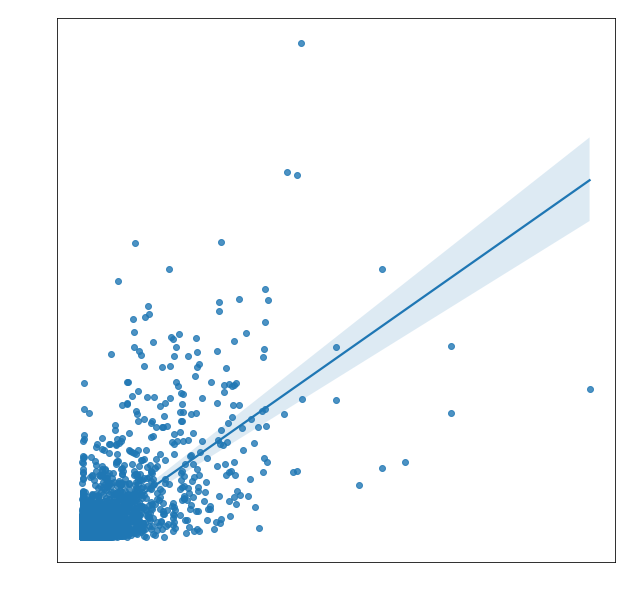

In [54]:
plt.figure(figsize=(10, 10))
sns.regplot(x="votes", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Votes', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [55]:
df.corr()['gross_worldwide']['votes']

0.7231502613872525

## User reviews (người)

Phân bố

In [56]:
def ur_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.user_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('user_reviews', fontsize=15)
    plt.show()



interact(ur_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có lượt đánh giá nhiều nhất

In [57]:
df[df.user_reviews == df.user_reviews.max()]

title                                         casts       directors  \
11  Joker  Joaquin Phoenix,Robert De Niro,Zazie Beetz,,  Todd Phillips,   

                                  writers                 genres certificate  \
11  Todd Phillips,Scott Silver,Bob Kane,,  Crime,Drama,Thriller,         C13   

    release_date    countries_of_origin languages  \
11        2019.0  United States,Canada,  English,   

                                 production_companies  ...      budget  \
11  Warner Bros.,Village Roadshow Pictures,Village...  ...  55000000.0   

    runtime  color                                sound_mix aspect_ratio  \
11    122.0  Color  SDDS,Dolby Atmos,Datasat,Dolby Digital,       1.85:1   

   score   votes  user_reviews  critic_reviews  metascore  
11   8.4  1100.0       11100.0           743.0       59.0  

[1 rows x 21 columns]

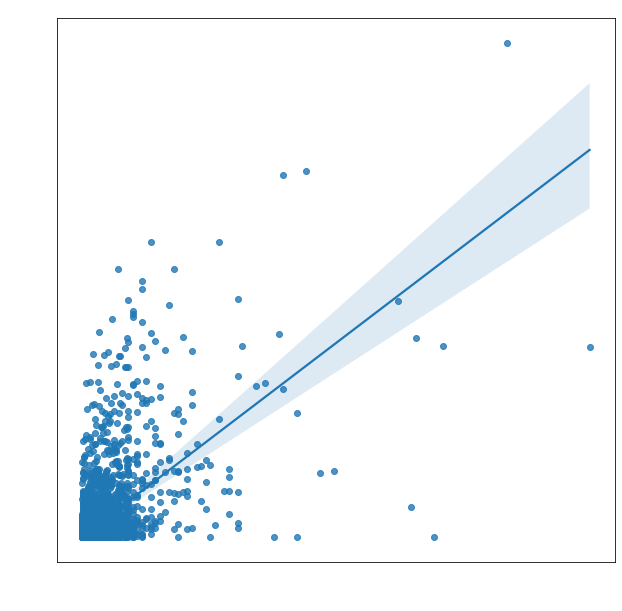

In [58]:
plt.figure(figsize=(10, 10))
sns.regplot(x="user_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('user_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [59]:
df.corr()['gross_worldwide']['user_reviews']

0.6243259050915766

## Critic Reviews (người)

In [60]:
def cr_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.critic_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('critic_reviews', fontsize=15)
    plt.show()



interact(cr_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Regplot

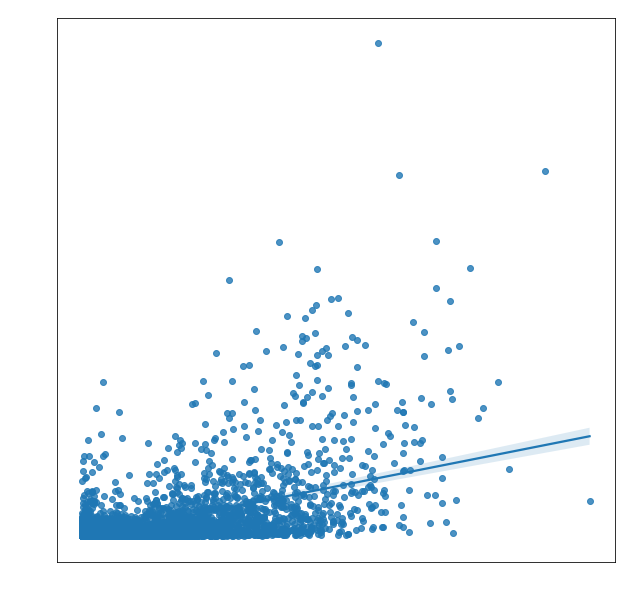

In [61]:
plt.figure(figsize=(10, 10))
sns.regplot(x="critic_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('critic_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [62]:
df.corr()['gross_worldwide']['critic_reviews']

0.5919838787693862

## Color

Số lượng

In [74]:
df.color.value_counts()

Color              19999
Black and White      174
Name: color, dtype: int64

Phân bố

In [75]:
def cl_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Color', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["color"],
                showfliers=showFliers)
    plt.show()
    
interact(cl_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có màu có doanh thu phân bố cao hơn

## Sound mix

In [63]:
soundMix = getList('sound_mix')
print(f'Gồm {len(soundMix)}')
for stt, cast in zip(range(0, len(soundMix)), soundMix):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 40
1  Soundelux
2  Dolby Digital
3  SDDS
4  DTS:X
5  70 mm 6-Track
6  D-Cinema 48kHz Dolby Surround 7.1
7  Sonics-DDP
8  Dolby Stereo
9  Dolby SR
10 D-Cinema 48kHz 7.1
11 D-Cinema 96kHz 7.1
12 Dolby Surround 7.1
13 D-Cinema 96kHz 5.1
14 Dolby Atmos
15 Silent
16 HoloSound
17 DTS-ES
18 Aurofone
19 6-Track Stereo
20 DTS
21 Dolby Digital EX
22 12-Track Digital Sound
23 D-Cinema 96kHz Dolby Surround 7.1
24 Ultra Stereo
25 Dolby
26 Mono
27 D-Cinema 48kHz 5.1
28 Auro 11.1
29 Dolby Digital(original version)
30 Sensurround
31 AGA Sound System
32 Auro 9.1
33 WANOS
34 DTS-Stereo
35 DTS 70 mm
36 Stereo
37 Dolby Surround 5.1
38 Datasat
39 IMAX 6-Track
40 Cinesound


Dolby                                5799
Dolby Digital                        4809
Dolby Atmos                          1020
SDDS                                  705
Datasat                               641
Dolby Surround 7.1                    566
DTS                                   404
Stereo                                344
Auro 11.1                             215
D-Cinema 48kHz 5.1                    165
Dolby SR                              156
IMAX 6-Track                           88
Sonics-DDP                             65
12-Track Digital Sound                 47
Dolby Digital EX                       44
D-Cinema 96kHz 5.1                     14
DTS-ES                                 10
6-Track Stereo                         10
Dolby Stereo                            8
Mono                                    8
DTS-Stereo                              6
WANOS                                   6
D-Cinema 48kHz 7.1                      5
DTS:X                             

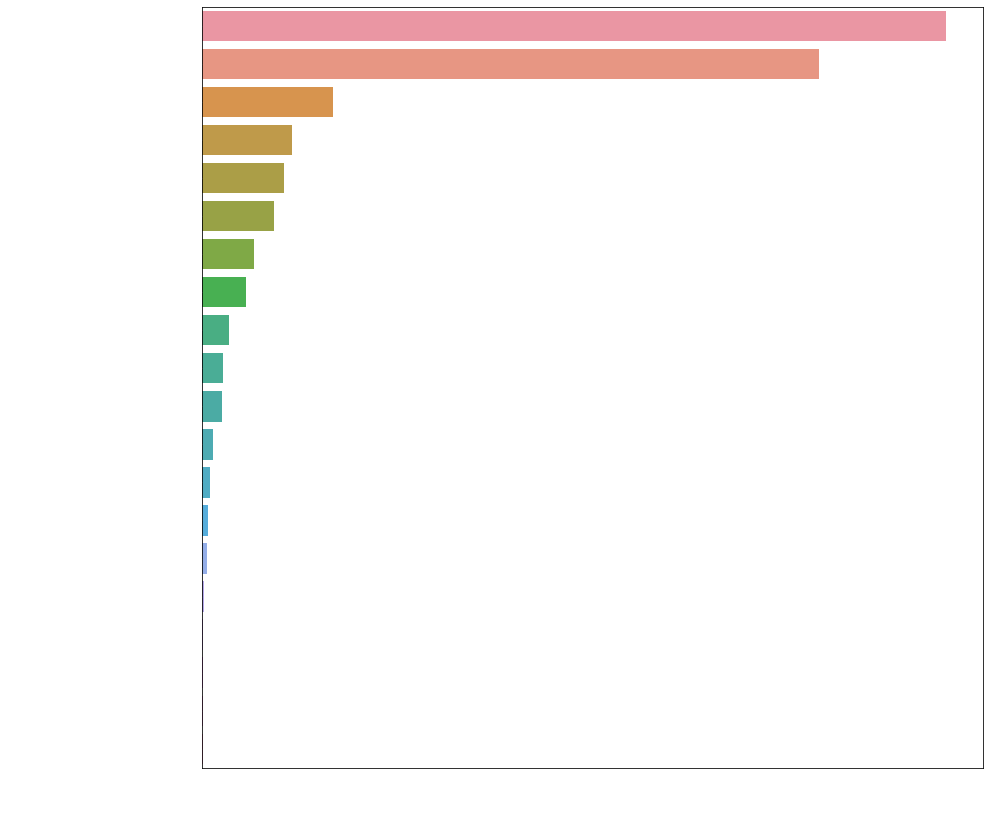

In [64]:
dataSM = []
for sm in soundMix:
    for line in df[df.sound_mix.str.contains(sm, na=False)].values:
        dataSM.append((line[0], sm, line[10], line[6], line[16]))  
dataSM = pd.DataFrame(data=dataSM, columns=['title', 'sound_mix', 'gross', 'year', 'score'])
print(dataSM.sound_mix.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="sound_mix",data=dataSM, order=dataSM.sound_mix.value_counts().index[0:20])
plt.ylabel('Sound Mix', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

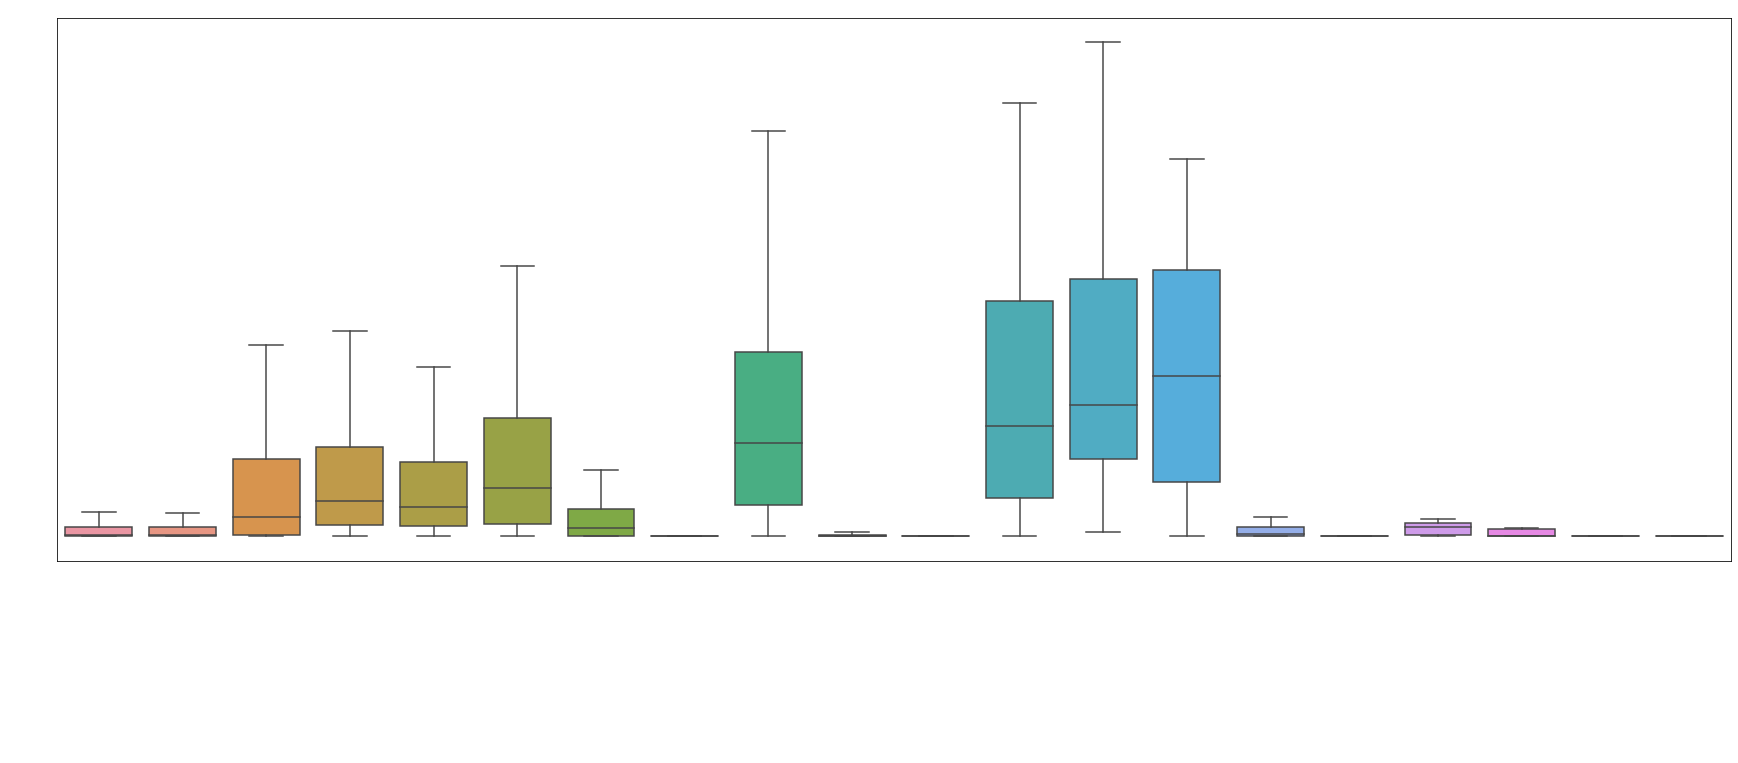

In [65]:
plt.figure(figsize=(30, 10))
sns.boxplot(y=dataSM["gross"], x=dataSM["sound_mix"],
            showfliers=False, order=dataSM.sound_mix.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Sound Mix', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

## Production_companies

In [100]:
df.production_companies.sample(1)

20456    Columbia Pictures,New Regency Productions,LSta...
Name: production_companies, dtype: object

In [66]:
comList = getList('production_companies') 
print(f'Gồm {len(comList)}')
for stt, cast in zip(range(0, len(comList)), comList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 16858
1  Polyphon Film-und Fernsehgesellschaft
2  M-Star International Culture & Media Co.
3  Sports Studio
4  SBS Productions
5  Abuelos la Película
6  F Films
7  Amazon.co.jp
8  Film Poeta
9  Vendian Entertainment
10 Eberhard Müller Filmproduktion
11 3K Pictures
12 22h22
13 Play Plus Yapim
14 Ingenious Media
15 Filma Pictures
16 Paperless Films
17 Hengda Pictures
18 Nicholas Sparks Productions
19 Filimo Film
20 Sorrows Entertainment
21 MM Productions
22 Sega Sammy Entertainment
23 Transformers
24 CCJ Films
25 Agência Nacional do Cinema (ANCINE)
26 Highwayman Films
27 Bona International Film Group
28 YouTube Originals
29 Dezenove Som e Imagem
30 Onaltidokuz Film
31 Cruel & Unusual Films
32 Habbekrats
33 Arden Film
34 SF Studios Production AB
35 Settembrini Film
36 Agence Algérienne pour le Rayonnement Culturel (AARC)
37 Prisma D'aplausos
38 Animus Pictures
39 Forfilms
40 ThunderSmoke Media
41 Vento Film
42 Demarest Films
43 CB Partners
44 Kings & Queens Filmproduktion
45 Alla Prim

2635 Özminimalist Film
2636 Snowfort Pictures
2637 Crowning Talents Entertainment
2638 Kakadua Filmproduktion
2639 Appian Way
2640 Gabriel
2641 Alwin Films
2642 Fifth Quarter
2643 Société des Producteurs de Cinéma et de Télévision (Procirep)
2644 Twice Told Films
2645 AL ONE S.r.l.
2646 Buffalo Picture House
2647 Meddin Studios
2648 Plot Media
2649 Monte dei Paschi di Siena
2650 Alvy Développement
2651 Frozen Flame Pictures
2652 League of Experimental Cinema
2653 Dylan Sellers Productions
2654 Metanoia Films
2655 Güeros Films
2656 Ren Film
2657 Fukui Shimbun
2658 Carnival Film & Television
2659 Small Axe Films
2660 Beijing Sili Culture Media
2661 Beijing Ruibo Xingchen Wenhua Chuanbo
2662 Rinkel Film
2663 Smokehouse Pictures
2664 Eyeworks Film
2665 Hoopoe Film
2666 Adnuco Pictures
2667 SRT Entertainments
2668 SharpSword Films
2669 TVINDIE Film Production
2670 CSC Production
2671 Cinéfeel 3
2672 Mediometrini
2673 Les Films d'Antoine
2674 Magma Films
2675 Sequin in a Blue Room
2676 K/O P

5125 Beijing Fengmang Culture Communication Co.
5126 Rod Pictures
5127 Bison Films
5128 Seven Elephants
5129 Chaz Productions
5130 Dead Hamster VFX Studio
5131 Moonglass
5132 Castelao Producciones
5133 Coconut Motion Pictures
5134 Stigma Films
5135 Dinglongda International Culture Communication
5136 Wayfarer Films
5137 Paradoks Film
5138 Lereby Productions
5139 Dry County Films
5140 Glass Man Films
5141 Aversano Films
5142 Minifilm
5143 Dong Yang Huan Yu Media
5144 Les Films du Poisson
5145 Antena 3 Films
5146 Picrow
5147 NEOS Film
5148 Los Angeles Media Fund (LAMF)
5149 Distressed Films
5150 Blond Indian Films
5151 ALT Entertainment
5152 Ekim Film
5153 Port Magee Pictures
5154 Leverage Films
5155 Mostra Internacional de Cinema de São Paulo
5156 kykNET
5157 Woollim Entertainment
5158 Beijing United Power Films
5159 Snowfall Films
5160 Galope Cine
5161 Kineo Filmproduktion
5162 Nemichand Jhabak
5163 Fuego Films
5164 ROAR Digital
5165 Anera Films
5166 Enjoy Movies
5167 Agallas Films
5168

7869 Gaïjin
7870 Race Point Films
7871 Naegle Ink
7872 Minutehand Pictures
7873 REP Film
7874 Prasar Visions
7875 666 Production
7876 Nubian Film Production
7877 Kidam
7878 Balkan Film
7879 KN Filmcompany
7880 Ottermole Moving Picture Company
7881 Apache Films
7882 Link Media Production
7883 Chaocorp Distribution
7884 Helsinki-Filmi
7885 Anwar Rasheed Entertainment
7886 Beijing Starlit Movie and TV Culture
7887 Bircan Film
7888 Page 1
7889 Black Ticket Company
7890 Simila(r)
7891 Dali Yapim
7892 Barney Production
7893 Wigwam Films
7894 Vita-Ray Dutch Productions (III)
7895 Fono Film
7896 Underground Logic
7897 Mattel Entertainment
7898 Hotel Hungaria
7899 Channel CGV
7900 Yoake Pictures
7901 CJ HK Entertainment
7902 Perspective Pictures
7903 Dave Made An LLC
7904 Centron Pictures
7905 Indian Summer Film
7906 EuroArts Music International
7907 And They're Off...
7908 Axis Media Production
7909 Aardman Animations
7910 Young Producers Forum
7911 Mario Pagano y Cinema Malpaso Producciones S

10869 Spring Wind Film Company
10870 Beijing Taichu Culture & Media
10871 Lionsgate UK TV
10872 Bad Decisions Productions
10873 Faith in Motion Productions
10874 Phenomen
10875 Water Bear Productions
10876 Urban Books Media
10877 Valofirma Cine Light Rental
10878 Wüste Film West GmbH
10879 Mouna
10880 Besiktas Kültür Merkezi (BKM)
10881 La Vie Est Belle Films Associés
10882 BZ Entertainment
10883 Novoprod
10884 Itochu
10885 2929 Entertainment
10886 Cave Bear Productions
10887 Love Streams Productions
10888 Quincy Pictures
10889 P13 Entertainment
10890 Loveless Entertainment
10891 Factory
10892 Hyde Park Entertainment
10893 Kaboom! Entertainment
10894 Shanghai Stone-Capital Culture Investment
10895 Orange Valley Production
10896 Kinology
10897 Deblokada
10898 S.Kids
10899 Kinoscópio Cinematográfica
10900 Pop Movies
10901 Longships Films
10902 BR3 Produções Artisticas
10903 Film Line
10904 Pantry Films
10905 El Costado S.A.
10906 MP Film Production
10907 Feil Film
10908 Green Olive Films

13555 Alcina Pictures
13556 Fukuoka Broadcasting System (FBS)
13557 Paramvah Studios
13558 Ayhan Isik Production & Actor Studio
13559 Shanghai Street Films
13560 ALLaBorde Films
13561 Indie Sales
13562 Dil Raju Production
13563 Nephilim Producciones
13564 Wise Goat Productions
13565 Las Cosas Nuevas S.L.U.
13566 Cadness Street
13567 Les Films du Bélier
13568 Maze Films
13569 Stemal Entertainment
13570 Belvision
13571 8Heads Productions
13572 MG Productions
13573 Quintessential Film
13574 Filmoon Pictures
13575 Långfilm Productions Finland Oy
13576 Stuffed Armadillo Productions
13577 Kinoproduction
13578 Bob Industries
13579 Arad Productions
13580 MPS Dallas
13581 Aeroplan Film
13582 La Gota Cine
13583 Andergraun Films
13584 Yoshimoto Creative Agency
13585 Milestone Company
13586 ECHO Film
13587 El Pampero Cine
13588 Pakt Media
13589 Markus Schleinzer
13590 Beijing Monsters Pictures Investment
13591 Katásia Filmes
13592 Princesse Béli
13593 Dandelion Production Inc
13594 Philistine Film

16368 Visiona Romantica
16369 Manian Pillai Raju Productions
16370 Sidus Animation
16371 Raruek Production
16372 La Palma de Oro Films
16373 Khorgos Taihe Digital Entertainment Cultural Development
16374 TV4 Nordisk Television
16375 Dream Theatres
16376 Illuminata Pictures
16377 Cork Films
16378 Cooperativa de Trabajo Caloi en su Tinta
16379 Latium Films
16380 Memorias Del Sabio Producciones
16381 FBB Studios
16382 SIMF Management
16383 Quickfoot Media
16384 Pupkin Film
16385 Martha Production
16386 Banca Popolare di Sondrio
16387 Big Farm
16388 Sridevi Movies
16389 Carnival Movie Network
16390 George Films
16391 Bell Film
16392 Portobello Productions
16393 Yellow Brick Films
16394 The Loss Adjuster Film
16395 MinT Production
16396 Kavac Film
16397 Dubai Media and Entertainment Organisation in association with Dubai Film Market (Enjaaz)
16398 Story Bridge Films
16399 Canam Movie Productions
16400 Viraat Films
16401 COCOON
16402 Incredible Film
16403 Comune di Napoli
16404 Pandora Filmp

## Cast

In [101]:
df.casts.sample(1)

15170    Anders Baasmo Christiansen,Olivier Mukuta,Slim...
Name: casts, dtype: object

In [67]:
castList = getList('casts')
print(f'Gồm {len(castList)} diễn viên')
for stt, cast in zip(range(0, len(castList)), castList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 32767 diễn viên
1  Chizuru Azuma
2  Carlos Mencia
3  Tom Vaughan-Lawlor
4  Katharina M. Schubert
5  Madison Wolfe
6  Haruka Tomatsu
7  Suavi Eren
8  Sebastián Zurita
9  Ludovik
10 Matthew Shear
11 Haifaa Adel
12 Bri Collins
13 Joaquín Gorbea
14 Candela Antón
15 Ahmed Malek
16 Radina Kardjilova
17 César Mourão
18 Val Kilmer
19 Mauricio Ochmann
20 Olli Dittrich
21 Bill Skarsgård
22 Mustafa Oral
23 Vladimir Georgiev
24 Tequan Richmond
25 Sang-mi Nam
26 Tiani Ghosh
27 Maysa Phanouvong
28 Kai Wang
29 Hamza Souidek
30 Gabriela Marcinková
31 efan de Walle
32 Shirin Redha
33 Ricardo Alanis
34 Zainab Jah
35 Sophie Marceau
36 Yücel Erten
37 Bruno Bergonzini
38 Shizuka Umemoto
39 René Mena
40 Rebeca Izquierdo
41 Mubariz Samadov
42 Sergio Assisi
43 Barbara Kingsley
44 Divya Pillai
45 Jean-Jacques Rausin
46 Mariya Shalayeva
47 Sofía Vergara
48 Murat Yatman
49 Maricel Álvarez
50 Tanju Tuncel
51 Nina Dobrev
52 Mitsuki Saiga
53 Mercè Llorens
54 Leo Bill
55 Shenyang Xiao
56 Tony Doyle
57 Xiyue An
5

2002 Mandy Chiang
2003 Ayten Uncuoglu
2004 efan Kurt
2005 Inés Palombo
2006 Patrick Timsit
2007 Beatrice Arnera
2008 Stephen Hughes
2009 Laura Aikman
2010 Dana Basso
2011 Matsutera Chiemi
2012 Gökhan Koç
2013 Lucía Guerrero
2014 Hugo Bariller
2015 Tina Desai
2016 Diljit Dosanjh
2017 Yolanthe Cabau
2018 Fernando Cardona
2019 Alexis Denisof
2020 Chi Pu
2021 Sophie Stanton
2022 Mitchell Edwards
2023 Jeffrey Grover
2024 Griffin Newman
2025 Luis Aranosky
2026 Markus Rygaard
2027 Rhys Ifans
2028 Giulia Bellucci
2029 Pejman Jamshidi
2030 Ventura
2031 Ausra Stukyte
2032 Thaïs Alessandrin
2033 Veselin Anchev
2034 Joakim Sällquist
2035 Gabriela Barros
2036 Paula Patton
2037 Antonio Resines
2038 Abra
2039 Vince Colosimo
2040 Phaim Bhuiyan
2041 eda Oguz
2042 Emmett J Scanlan
2043 Yang Yang
2044 Marié du Toit
2045 Mohsen Namjoo
2046 Rachelle Lefevre
2047 Rey Goyos
2048 Inga Berger Schou
2049 Louka Minnella
2050 Milvia Marigliano
2051 Luke Edwards
2052 Irina Skuratova
2053 Josh Gad
2054 Afrikali Ali

2943 Ashley Bril
2944 Jing Jiang
2945 Lize Feryn
2946 Cauã Reymond
2947 Maiken Pius
2948 Ardal O'Hanlon
2949 Garrett Clayton
2950 Igor Regalla
2951 Diego Leon Cusumbo
2952 Juan Du
2953 Yeong-ran Lee
2954 Albie Casiño
2955 Camila Selser
2956 Michael Peña
2957 hun Nishime
2958 Ed Harris
2959 Olimpia Melinte
2960 Stanislav Duzhnikov
2961 Mattia Garaci
2962 Graham McTavish
2963 Paulina Krzyzanska
2964 Debby Ryan
2965 i Srinivas Bellamkonda
2966 Patrick Dempsey
2967 Tülin Özen
2968 Umut Beskirma
2969 Theresa Healey
2970 Vladimír Javorský
2971 Katharina Schüttler
2972 Stephen McKinley Henderson
2973 Rebekah Staton
2974 Ester Geislerová
2975 Scott McNeil
2976 Doga Rutkay
2977 Evgeniy Koshevoy
2978 Lakshmi
2979 Fernando Arze Echalar
2980 Stanley Tucci
2981 Katia Szechtman
2982 Jef Goyhenexpe
2983 Leonor González Mina
2984 Germán Alcarazu
2985 Joaquín Escobar
2986 Emma Thompson
2987 Bianca Heinicke
2988 Janelle Ginestra
2989 Aimee Campbell
2990 Sandra Ceccarelli
2991 Ian Bohen
2992 Cédric Appie

5001 Valentina Gómez
5002 Elizabeth Becka
5003 Isabelle Allen
5004 Vivian Wu
5005 Elias Koteas
5006 Lucas Crespi
5007 Gary Graham
5008 Cansu Karatas
5009 Sanjana Shetty
5010 Simone van Bennekom
5011 Rodin Alper Bingol
5012 Nora El Koussour
5013 Renee Wiggins
5014 William Forsythe
5015 Fabio Bongini
5016 Klarissa Barskaya
5017 Ito Ono
5018 Ken'ichirô Matsuda
5019 heila Hancock
5020 Yû Kamio
5021 Alev Alemdaroglu
5022 Brooke Langton
5023 Christina Storm
5024 Steve Douzos
5025 Deok-Hwan Ryu
5026 Arsher Ali
5027 Justin Dubé
5028 Drew Pinsky
5029 Kerem Can
5030 Louise Nyvall
5031 Indraneel Bhattacharya
5032 Daniela Ramírez
5033 Arianna Bergamaschi
5034 Monica Dogra
5035 Lee Jung-jae
5036 Manav Kaul
5037 Teresa Côrte-Real
5038 Benjamín Rojas
5039 Nahman Ashkenazi
5040 Giuseppe Battiston
5041 Yixiang Li
5042 Zuzana Stavná
5043 Ema Svábenská
5044 Daizaburo Arakawa
5045 Santiago Alfonso
5046 Jack Smith
5047 Melody Klaver
5048 Aleksey Gorbunov
5049 Caroline Newton
5050 T.C. Stallings
5051 Ariel 

5501 Tatiana Ariza
5502 Kate Micucci
5503 Çosku Cem Akkaya
5504 Toby Wallace
5505 Billy Crawford
5506 Anton Rival
5507 Cansel Aydos
5508 Robert Gulaczyk
5509 Yûtarô Furutachi
5510 Jennifer Saunders
5511 Kento Kaku
5512 Aleksandr Farber
5513 Mónica García
5514 Lady Gaga
5515 Wei Lee
5516 Artyom Suchkov
5517 Pedro Durán
5518 Svezhen Mladenov
5519 Gaurav Pahari
5520 Ekaterina Albrandt
5521 Diane Dassigny
5522 Fabián Gianola
5523 John Lloyd Cruz
5524 Tunde Adebimpe
5525 Steve Coogan
5526 Ellen Hollman
5527 Yvette Yzon
5528 Yang Miller
5529 David Bark-Jones
5530 Mariana Rios
5531 Hans Zhang
5532 Anna Sigalevitch
5533 Marian Rivera
5534 Rie Kugimiya
5535 Sayed Ahmad
5536 Oscar Dyekjær Giese
5537 Ruslaan Mumtaz
5538 Buffy Chen
5539 Takayuki Hamatsu
5540 Ilaria Occhini
5541 Yihan Sun
5542 Isabella Ferrari
5543 Saki Fujita
5544 Andrea Santamaria
5545 Steven Hauck
5546 Justyna Schneider
5547 Behice Maurer
5548 Treat Williams
5549 Tianhui Zhai
5550 Matthias Schoenaerts
5551 Hacken Lee
5552 Yener 

8000 Jason Wu
8001 Zura Kipshidze
8002 Rakshit Shetty
8003 Clarice Falcão
8004 Germán de Silva
8005 Nico Rockwell
8006 Ibrahim Selim
8007 Russell Harvard
8008 Nayyar Ejaz
8009 Flore Babled
8010 Paloma Soto
8011 Eliza Rycembel
8012 Rufus Sewell
8013 Gledys Ibarra
8014 Josef Trojan
8015 Leopold Buchsbaum
8016 Louisa Harland
8017 Sergey Druzyak
8018 Lehasa Moloi
8019 ofia Mirpuri
8020 Chiung-Tzu Chang
8021 Jianmin Li
8022 Gulshan Devaiah
8023 Spela Colja
8024 Sophia Bush
8025 Hannah Grace
8026 Bobbi Jene Smith
8027 Abdulkadir Tuncer
8028 Vanessa Zhao
8029 Tilman Pörzgen
8030 Byron Brown II
8031 Kevin Vechiatto
8032 Kenny Doughty
8033 Songtao Guo
8034 Bing Loyzaga
8035 Anchen du Plessis
8036 Ozan Ayhan
8037 Xuebing Wang
8038 Kim In-kwon
8039 Maria Paula
8040 Balkar Sidhu
8041 Bernardo Morico
8042 Andile Gumbi
8043 Campbell Scott
8044 Malgorzata Gorol
8045 Achim Sachs
8046 Ayyildiz Beslen
8047 Kasumi Arimura
8048 Donna Murphy
8049 Mihai Calin
8050 Dana Dogaru
8051 Linda So
8052 Rith Luecha


10999 Altus Theart
11000 Hayal Köseoglu
11001 Krista Kosonen
11002 Thanabordee Jaiyen
11003 Patrick Hickman
11004 Paula Grinszpan
11005 Debra Wilson
11006 Niksa Butijer
11007 Victor Quilichini
11008 Jovana Stojiljkovic
11009 Jim Norton
11010 Cyprian Grabowski
11011 Visshesh Tiwari
11012 Tharun Bhascker Dhaassyam
11013 Meng Lai
11014 Thomas Aske Berg
11015 Tsuki Angel
11016 Vera Yen
11017 Oscar Alegre
11018 Vilhelm Blomgren
11019 Ruth Geller
11020 Hannah New
11021 Kokoro Hirasawa
11022 Julio Bohigas-Couto
11023 Alex Holdridge
11024 Paulina Singer
11025 Vangelis Mourikis
11026 Sanâa Alaoui
11027 Zhou Jun-Chao
11028 Jake Gyllenhaal
11029 Nana Komatsu
11030 Abi Hassan
11031 Natalia Ruiz Cobo
11032 Eugen Grigoriev
11033 Themis Pauwels
11034 Bill Hader
11035 Hannes Brummer
11036 Cecilia Han
11037 Kristian Milatinov
11038 Talat Bulut
11039 Kris Avedisian
11040 Arthur Jugnot
11041 Iniya
11042 Mary Callanan
11043 Tyler Perry
11044 Sandra Sandrini
11045 Adjie Nur Ahmad
11046 Yûka
11047 Jo D. Jon

13998 Aytaç Arman
13999 Ivan Botha
14000 Hatice Aslan
14001 Ekaterina Barykina
14002 Ann Petrén
14003 Sandra James-Young
14004 Jassie Gill
14005 Marco Joel Fernandes
14006 Claudio Medina
14007 Laurent Morteau
14008 Santiago Saranite
14009 Elena Polyanskaya
14010 Alejandro Buenaventura
14011 Suwikrom Amaranon
14012 Kim Hee-won
14013 Sterling Jerins
14014 Sabrina Wilstermann
14015 Isabél Zuaa
14016 Anamaria Marinca
14017 Philippe Girard
14018 Chen Zhiui
14019 Naveen Chandra
14020 Marcello Novaes
14021 Manuel Broekman
14022 Mónica Villa
14023 Zeru Tao
14024 Ugur Can Akgül
14025 Ismael Caneppele
14026 Bert Luppes
14027 Thuy Hang Do
14028 ung-Woo Bae
14029 Peter Faber
14030 Natalia Bilbao
14031 Inka Friedrich
14032 Jace Norman
14033 Felipe Botero
14034 Kai-Yuan Cheng
14035 Vlad Zamfirescu
14036 Simone Labarga
14037 Monica Jimenez
14038 Pariyachat Limthammahisorn
14039 Marlene Risch
14040 Jeffrey Cirio
14041 Václav Bárta
14042 Natasha Petrovic
14043 Kim Thien
14044 Dheya Abdulkhaleq
14045 Yi

16998 Helena Howard
16999 Ian Coppinger
17000 Adrian Paul
17001 ylvie Marinkovic
17002 Alí Rondón
17003 hao-Wen Hao
17004 Alejandro Goic
17005 Mansur Ark
17006 Ji-Hoon Jung
17007 Rufus
17008 Essence Atkins
17009 Jim Sturgess
17010 Wai Kun Ieong
17011 Sheetal Sheth
17012 Van Phuong
17013 Gustavo Bonfigli
17014 Eddie Eriksson Dominguez
17015 Daniel Frederiksen
17016 Aleksey Demidov
17017 Gladys Florimonte
17018 Ricky Coello
17019 Pawan Kalyan
17020 Huynh An
17021 Madeline Thelton
17022 Ryôsuke Yamamoto
17023 Melisa Giz Cengiz
17024 Pasupathy
17025 Turgut Gunes
17026 un Chaiyamart
17027 Güven Murat Akpinar
17028 Jason Segel
17029 Shaun Sipos
17030 evil Aki
17031 Zita Hanrot
17032 Ana Carol Machado
17033 Carmine Faraco
17034 Nijirô Murakami
17035 Ashton Chen
17036 Johnny Messner
17037 hane Jacobson
17038 Giannis Drakopoulos
17039 Jennifer Finnigan
17040 Dean Chaumoo
17041 Océan
17042 Fiorenza Liu
17043 Grace Gummer
17044 Mareena
17045 Alexander ElMecky
17046 Cem Kurtoglu
17047 Liam Boyle
1

19997 Antoine Laurent
19998 Akron Watson
19999 Whitney Hui
20000 Guilherme Winter
20001 Turgay Tanülkü
20002 Muchen Tian
20003 Álex Barahona
20004 Amarachi Amusi
20005 Souleymane M'Baye
20006 Raffaele Pisu
20007 Rooney Mara
20008 Josu Cubero
20009 Michael O'Keefe
20010 Christian Bables
20011 Tage Johansen Hogness
20012 Karen Abercrombie
20013 Lucio Hernández
20014 Nicolaj Kopernikus
20015 Brian Krause
20016 Nihal Yalcin
20017 Darius Auzelis
20018 Serban Pavlu
20019 David Henrie
20020 Javier López
20021 Hassina Burgan
20022 Eugene Koekemoer
20023 Petar Strugar
20024 Slimane Dazi
20025 Sara Carinhas
20026 Sergey Badyuk
20027 Laila Berzins
20028 Benn Northover
20029 John Diehl
20030 Eugenia Rigón
20031 Travis Tope
20032 Paul Jesson
20033 Stefan Velniciuc
20034 Adriano Chiaramida
20035 Luciene Soares da Silva
20036 Nikolay Marton
20037 Daniel Furlan
20038 Ashlee Simpson
20039 Massimiliano Gallo
20040 Jessica Szohr
20041 Yograj Bhat
20042 dia Khateeb
20043 ephen Graham
20044 Linda Baldrich


22997 Ellinore Holmer
22998 Sloboda Micalovic
22999 ofía Urosevich
23000 Jonathan Lambert
23001 Margarida Moreira
23002 Robert Daniel Sloan
23003 Philippe Nahon
23004 i-Yang Kwak
23005 Guillem Fernàndez-Valls
23006 Camilo Parodi
23007 Malin Crépin
23008 Marcus Macleod
23009 Cristina Hernandez
23010 Audrey Fleurot
23011 Carlyn Burchell
23012 Tom Vermeir
23013 Urmila Matondkar
23014 Sharon Maughan
23015 Luz Champané
23016 Huseyin Ezgi Taskin
23017 Willis Earl Beal
23018 Ramy Ayach
23019 Biassini Segura
23020 Joshua Jackson
23021 Benoit Dobbelstein
23022 Ekin Türkmen
23023 Alice Bellagamba
23024 Nordine Salhi
23025 Catherine French
23026 Irina Pegova
23027 William Jøhnk Nielsen
23028 Teresa Gimpera
23029 Keith Collins II
23030 Tao Chiang
23031 Kaitlyn Chalmers-Rizzato
23032 Brian Hankey
23033 Joan Botey
23034 Marc-André Grondin
23035 Zac Efron
23036 Ahmed Helmy
23037 Bia Arantes
23038 Sarah-Sofie Boussnina
23039 Richard Córdoba
23040 Patrick Chesnais
23041 Olga Odanovic
23042 Rafal Mackow

25996 Llorenç González
25997 Katherine Mulville
25998 Norrapat Sakulsong
25999 hafaat Ali
26000 Kate Moran
26001 Halle Berry
26002 Tyne Daly
26003 ivakarthikeyan
26004 Subhasish Ghosh
26005 Manjit Singh Gill
26006 Bob Buchholz
26007 Hank Azaria
26008 Plácido Domingo
26009 Catherine Wilkin
26010 Teddie-Rose Malleson-Allen
26011 Brian Austin Green
26012 Roy 5tion
26013 Gard B. Eidsvold
26014 Satoru Kawaguchi
26015 Xavier Beauvois
26016 Daphne Patakia
26017 Jessica Hester Hsuan
26018 Xiaoye Liu
26019 Semyon Treskunov
26020 Teo Guarini
26021 Carrie Keagan
26022 Chinmayee Surve
26023 Jirina Bohdalová
26024 Mark Garrawurra
26025 Jillian Bell
26026 Elizabeth Saunders
26027 Brianne Tju
26028 Owen Vaccaro
26029 Samuel Ting Graf
26030 Javier Arroyo
26031 Santiago Segura
26032 ef Aerts
26033 Shin Ha-kyun
26034 Yalin Gao
26035 Aleksandra Orbeck-Nilssen
26036 Anna Javorková
26037 Ana Valeria Becerril
26038 David Hayman
26039 Chusheng Chen
26040 Ana Cañas
26041 Ximena Ayala
26042 Sayani Gupta
26043 

28996 Fernando García Linares
28997 Lautaro Perotti
28998 Marie Askehave
28999 Ashleigh Ball
29000 Jimmy Labeeu
29001 Angelique Cavallari
29002 Alisha Rene
29003 Hortêncílio Aquina
29004 Jun'ichi Suwabe
29005 Madhura Deshpande
29006 Zinédine Zidane
29007 Larry Bourgeois
29008 Julia Ormond
29009 Josephine Langford
29010 Mark Duplass
29011 Lifen Jiang
29012 Qing Miao
29013 hahad Alahmari
29014 Emile Hager
29015 Robin Sydney
29016 Yan Liu
29017 Victoria Diamond
29018 Dennis Budesheim
29019 William Mapother
29020 Aleksandr Bashirov
29021 Ernesto Gómez Cruz
29022 Ye-ryeon Cha
29023 Alain Cavalier
29024 Kerry Armstrong
29025 Birbal
29026 Shiva
29027 Pepe Mujica
29028 Elvira Mínguez
29029 Anton Adasinsky
29030 Vismaya
29031 Michael Peavoy
29032 Lulu Xu
29033 Christopher Sabat
29034 Cem Göktas
29035 Alejandro Patiño
29036 Do An
29037 Jurate Onaityte
29038 Ana Risueño
29039 Büsra Apaydin
29040 Reni Pittaki
29041 Jakob Davies
29042 Sirin Giobbi
29043 Maude Apatow
29044 Noëlle Perna
29045 Alain D

31995 Amanda Lear
31996 Michelle Ryan
31997 Michael Starrbury
31998 Franca Licata
31999 Carl Malapa
32000 Bálint Sótonyi
32001 Mila Kunis
32002 Abel Abebe
32003 Jon Silberg
32004 Elizabeth Berrington
32005 Ying Huang
32006 Xuan Gu
32007 Brigitte Catillon
32008 Yuriy Filatov
32009 Mireille Enos
32010 Jiexi Wang
32011 Basima Hajjar
32012 Yaakov Zada Daniel
32013 usanne Sachße
32014 Paulo André
32015 Emilie Blon-Metzinger
32016 Manal El-Feitury
32017 William Atherton
32018 Marlene Hauser
32019 Edwin van der Walt
32020 Kuan-Ting Liu
32021 ebastian Blomberg
32022 Hassan Akkouch
32023 Gianni Di Gregorio
32024 Luna Fulgencio
32025 Rebecca Ferguson
32026 Saad Hamdan
32027 Daniel Martins
32028 Pål Sverre Hagen
32029 Bhavin Bhanushali
32030 Thanyaphat Buapant
32031 Sophie Turner
32032 Aga Muhlach
32033 Yoo Yeon-Seok
32034 Johnny Hallyday
32035 m Milby
32036 Füsun Demirel
32037 Fabian Backhaus
32038 Hakan Bilgin
32039 Pongsapat Kankham
32040 Hunter Cope
32041 Thinh Vinh
32042 Terrence Jenkins
320

## Director

In [102]:
df.directors.sample(1)

11136    Yuno Shamilov,
Name: directors, dtype: object

In [68]:
dicList = getList('directors')
print(f'Gồm {len(dicList)} Đạo diễn')
for stt, cast in zip(range(0, len(dicList)), dicList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 14314 Đạo diễn
1  Moon So-ri
2  Kar Lok Chin
3  Rick Bieber
4  Hideki Kiyota
5  Milorad Krstic
6  Hunter West
7  Wei Dai
8  Joe Thomas
9  Samkan Chotikasawad
10 Anton Barshchevsky
11 Tommy Stovall
12 Nancy Meyers
13 Daniel Guzmán
14 Norman Ruiz
15 Jitka Rudolfová
16 Selçuk Aydemir
17 Eric Darnell
18 Asghar Farhadi
19 Harmony Korine
20 Sandra Wollner
21 Mari Okada
22 Keith Miller
23 Sung-hyun Byun
24 Stanislav Kapralov
25 Jeanine Meerapfel
26 Byung-gil Jung
27 Gloria Stella
28 Anar Abbasov
29 Ayhan Sonyürek
30 Amir Mohiuddin
31 Alessandro Capitani
32 Bernardo Cañizares Esguerra
33 Rod Lurie
34 Nicole Garcia
35 Johanan Benavides
36 Vincent Macaigne
37 Leonardo Pieraccioni
38 Zack Snyder
39 Matthew Porterfield
40 Christos Dimas
41 Basil Joseph
42 Dominique Farrugia
43 Eva Ionesco
44 Oleh Borshchevskyi
45 Diederd Esseldeurs
46 Meliksah Altuntas
47 Jiang Liu
48 Chang-Yong Song
49 Oskars Rupenheits
50 Simon Yam
51 Sergey Livnev
52 Jeon Gye-soo
53 Philippe Muyl
54 Hannu Aukia
55 Sameer Vi

1908 MJ Lallo
1909 Jonathan Jakubowicz
1910 Vincent Kesteloot
1911 Sarah Adina Smith
1912 Mel Gibson
1913 Onur Bilgin
1914 Sasie Sealy
1915 Jung-Wook Ko
1916 Sonam Nair
1917 Ray Bengston
1918 Pedro Morelli
1919 Sheng Ding
1920 Ann Hu
1921 Kiran Rao
1922 Matías Galli
1923 Darya Charusha
1924 Verónica Chen
1925 Anqi Liu
1926 Ittisak Eusunthornwattana
1927 Lucas Lee Graham
1928 Amy Heckerling
1929 Alen Drljevic
1930 Pradeep Ranganathan
1931 Ralitza Petrova
1932 Scott Teems
1933 Pascal Hérold
1934 Gyoo-min Kim
1935 Shivam Nair
1936 Eva Vives
1937 Bin Huang
1938 Patricia DiSalvo Viayra
1939 Nadine Labaki
1940 Haluk Ünal
1941 Sanjay Jadhav
1942 Subhash Ghai
1943 Alejandro Lubezki
1944 Matt Bettinelli-Olpin
1945 Doga Can Anafarta
1946 Tarô Ohtani
1947 Mauro Borrelli
1948 Sekhar Kammula
1949 César Augusto Acevedo
1950 Andrey Tomashevskiy
1951 Roman Sidorenko
1952 Eon-hie Lee
1953 Srdjan Spasojevic
1954 Simona De Simone
1955 Kathrine Windfeld
1956 Aleksandr Nezlobin
1957 Çagatay Düz
1958 Amar K

2720 Tomorô Taguchi
2721 Khadija Al-Salami
2722 Sean Patrick O'Reilly
2723 Hiner Saleem
2724 Jie Yuan
2725 Konstantin Khudyakov
2726 Kauê Telloli
2727 Jota Linares
2728 Emmanuel Osei-Kuffour
2729 Lang Qin
2730 Sergey Seryogin
2731 Carsten Fiebeler
2732 Matteo Martinez
2733 Ivo van Hove
2734 Wilson Yip
2735 Maxim Korostyshevsky
2736 John Boorman
2737 Antoon Krings
2738 Balázs Lengyel
2739 Lloyd Goldfine
2740 Ralf Kukula
2741 Toshio Lee
2742 Hing Fan Wong
2743 Kai Parlange Tessmann
2744 Parasuram
2745 Alejandro Chomski
2746 Yongkang Tang
2747 Ömer Ugur
2748 David Prior
2749 Saida Benzal
2750 Mirca Viola
2751 Norton Virgien
2752 Jim Gillespie
2753 Samih El-Naqqash
2754 Brett Sullivan
2755 Mustafa Ugur Yagcioglu
2756 Sergio Caballero
2757 Paco Caballero
2758 Franck Richard
2759 Kiyotaka Taguchi
2760 Richard Gray
2761 Pedro C. Alonso
2762 Erick Cortés Alvarez
2763 Marco Ponti
2764 Nadir Moknèche
2765 Channing Godfrey Peoples
2766 Jacob Kornbluth
2767 Hüseyin Tabak
2768 Mahmut Kaptan
2769 Hy

4563 Shunsuke Kariyama
4564 Neill Blomkamp
4565 Laxman Utekar
4566 Yecid Benavides
4567 Juan José Jusid
4568 Fredrik Bond
4569 Sunny Deol
4570 David Jarab
4571 Abram Cox
4572 Mahmut Fazil Coskun
4573 Damien Macé
4574 Gakuryû Ishii
4575 Jibin Sun
4576 Sylvia Chang
4577 Simon Aboud
4578 Amp Wong
4579 Diego Ávila
4580 Yasuo Furuhata
4581 Rachel Maclean
4582 Paulo Leite
4583 Roan Johnson
4584 Riccardo Jacopino
4585 Chris Mason Johnson
4586 Ross Patterson
4587 Darrell Roodt
4588 Akane Yamada
4589 Min Kyung-Jo
4590 Hirokazu Koreeda
4591 Sonny Mallhi
4592 Vanessa Filho
4593 Polo Menárguez
4594 Somching Srisupap
4595 Hakan Ciga
4596 John Leguizamo
4597 L.A. Lopes
4598 Benjamin Renner
4599 Mohamed Gamal El-Adl
4600 Jeff Richter
4601 Danilo Beckovic
4602 Lars Berg
4603 Louis Garrel
4604 Jake Scott
4605 Nadège Loiseau
4606 Isaac Feder
4607 Coco Martin
4608 Will Wallace
4609 Mario Tronco
4610 R.S. Prasanna
4611 Babak Payami
4612 Jub Clerc
4613 Thiru
4614 Carlos Reygadas
4615 Amir Chamdin
4616 Paul

5537 Chris Sparling
5538 Tim Rouhana
5539 Luca Della Grotta
5540 Peter Sattler
5541 Florence Quentin
5542 Ufuk Bayraktar
5543 Joachim Krenn
5544 RZA
5545 Jonathan Geva
5546 Jean-Luc Gaget
5547 Agustín Gregori
5548 Celia Catunda
5549 David Fincher
5550 Ismet Eraydin
5551 John Ridley
5552 Özcan Deniz
5553 Adilkhan Yerzhanov
5554 Saad Khan
5555 Billy Dickson
5556 Deb Medhekar
5557 Robert J. Mrazek
5558 Daniele Vicari
5559 Nick Leung
5560 Chang-hee Lee
5561 Bruno Chiche
5562 Bryan O'Neil
5563 Judy Naidoo
5564 Yue Song
5565 Haruki Kadokawa
5566 Mats Arehn
5567 A. Sarkunam
5568 Puri Jagannadh
5569 Mariana Arruti
5570 Mohit Banwait
5571 Dagmar Seume
5572 Alejandro Gruz
5573 Gábor Rohonyi
5574 Nick Dalmacy
5575 Óscar Rojo
5576 Nick Bruno
5577 Thitipong Chaisati
5578 Jim Mickle
5579 Yuriy Bykov
5580 Jean-Pierre Dardenne
5581 Arnaud Desplechin
5582 Daniel Borgman
5583 Jin-mo Cho
5584 Henry Hobson
5585 Søren Frellesen
5586 Shane Dawson
5587 Romain Lévy
5588 Nan Zhou
5589 Matt Spicer
5590 Ryan Gos

7452 Ognjen Glavonic
7453 Wisit Sasanatieng
7454 Dover Koshashvili
7455 Umesh Ghadge
7456 Evan Glodell
7457 Livia De Paolis
7458 Rob Fitz
7459 Yong-jib Park
7460 Beatriz Seigner
7461 Edgardo Castro
7462 Pavan Mallela
7463 Clovis Mello
7464 Oliver Laxe
7465 Stewart Raffill
7466 Andrea Goroni
7467 Brian Webber
7468 Sylvain Desclous
7469 Achero Mañas
7470 Young-doo Oh
7471 Yasuto Nishikata
7472 Caye Casas
7473 Antonio Guerriero
7474 Gulshan Singh
7475 Chris Kraus
7476 Pablo Trapero
7477 Paulo Caldas
7478 Juuso Laatio
7479 Kasper Holten
7480 Albert Hughes
7481 Daniela Goggi
7482 Cyrill Boss
7483 Simon Fellows
7484 Renat Davletyarov
7485 David Chase
7486 Mike Marzuk
7487 Mark Cousins
7488 Kana Matsumoto
7489 Denis Côté
7490 Bernard Attal
7491 Manu Ashokan
7492 Eric Guillon
7493 Sean Anders
7494 Manuel Mozos
7495 Lee Sales
7496 Lili Bai
7497 Charlotte Sieling
7498 Jacques Martineau
7499 Roman Musheghyan
7500 Hugo Cardozo
7501 Sílvia Fraiha
7502 Firat Gursoy
7503 Jim Cummings
7504 Dana Budisa

8218 Manuel Martín Cuenca
8219 Delfina Castagnino
8220 Bob Nelson
8221 Julio Bove
8222 Maria Peters
8223 Philippe Asmar
8224 Major Ravi
8225 Virinchi Varma
8226 Matias Tapia
8227 Sebastián Sarquís
8228 Jae-rim Han
8229 Sydney Sibilia
8230 Michael Noer
8231 Elizabeth Wood
8232 Yong-geun Min
8233 Seiji Mizushima
8234 Obin Olson
8235 Alain Gomis
8236 Eva Toulová
8237 Antonio Méndez Esparza
8238 Ulrike Grote
8239 Philippe Lioret
8240 Edmundo H. Rodríguez
8241 Stuart Murdoch
8242 Pieter Kuijpers
8243 Laurie Simmons
8244 Selim Gunes
8245 Mark Burton
8246 Li Zhang
8247 Clément Oubrerie
8248 Danis Tanovic
8249 Marcelo Politano
8250 Jeb Stuart
8251 Danilo Serbedzija
8252 SABU
8253 Raul del Busto
8254 Gauri Shinde
8255 Jasi Channa
8256 S.U. Arun Kumar
8257 R.J. Cutler
8258 Radha Krishna Jagarlamudi
8259 David Galán Galindo
8260 Amole Gupte
8261 Robert Hall
8262 Muayad Alayan
8263 Alek Kort
8264 Moacyr Góes
8265 Pankaj Sehgal
8266 Robin Lough
8267 Guy Nattiv
8268 Pablo D'Alo Abba
8269 Aurel Klimt

10218 Guilherme Fiúza Zenha
10219 Oi Wah Lam
10220 Steve McLean
10221 Adam Salky
10222 Sharrath Sandith
10223 Gökhan Aksu
10224 Rob Zombie
10225 Suh-Goon Lee
10226 Rufus Norris
10227 Mamoru Hoshi
10228 Jong-kwan Kim
10229 Pavel Göbl
10230 Dean Jones
10231 Tommy Lee Jones
10232 Obi Emelonye
10233 Gregory Lamberson
10234 Otmar Penker
10235 Vi Anand
10236 Alexandre Astier
10237 Augustinas Gricius
10238 David R. Ellis
10239 Feo Aladag
10240 David Bowers
10241 Michael Dougherty
10242 Alisa Khazanova
10243 Prakash Kunjhan Moorayil
10244 Vianney Lebasque
10245 Doo Byung Chae
10246 Yoshinari Nishikôri
10247 Alper Mestçi
10248 Elliott Covrigaru
10249 Belmin Söylemez
10250 Daryne Joshua
10251 Joaquín Mazón
10252 Raana
10253 Ivan Botha
10254 Gökçin Dokumaci
10255 Samuel Ortí Martí
10256 Tassos Boulmetis
10257 Zam Salim
10258 Natalia Santa
10259 Scott Bates
10260 Lance Hool
10261 Antoine Desrosières
10262 Nagesh Kukunoor
10263 Stéphane Kazandjian
10264 Dani de la Orden
10265 Ismail Ciydem
10266 Ma

11216 Jong Hyeon Yang
11217 Cedric Nicolas-Troyan
11218 Wajahat Rauf
11219 Brian Yuzna
11220 Cenk Çelik
11221 Andrey Smirnov
11222 Songyos Sugmakanan
11223 Zhang Wen
11224 Yannis Economides
11225 Matti Ijäs
11226 Holger Tappe
11227 Shawn Ku
11228 Younguee Yoo
11229 Mehmet Ali Konar
11230 Stepan Altrichter
11231 Jakub Tarkowski
11232 Mohammed Ehteshamuddin
11233 Michael Biehn
11234 Jie Liu
11235 Phil Alden Robinson
11236 Wei Wang
11237 Ian Sbf
11238 Sheng Qiu
11239 Giuseppe Piccioni
11240 Lee Min-jae
11241 Matteo Norzi
11242 Dimitri de Clercq
11243 Zhiyi Zhang
11244 Wei Gu
11245 David Kocár
11246 Gareth Edwards
11247 Fernando Salem
11248 Hwan Lee
11249 Alejandro Lozano
11250 Malik Nejer
11251 Ron Krauss
11252 Masashi Koizuka
11253 H. Vinoth
11254 Mariano González
11255 Aaron Woodley
11256 Yüksel Aksu
11257 Martin Scorsese
11258 Murat Kuscu
11259 Sultan Khazhiroko
11260 S.S. Rajamouli
11261 Diego Martínez Vignatti
11262 Bromley Cawood
11263 Mridul Nair
11264 Hisashi Kimura
11265 Gagan Pu

12880 Lee Unkrich
12881 Ute von Münchow-Pohl
12882 Kasia Adamik
12883 Josh Gordon
12884 Cem Tabak
12885 Barry Sonnenfeld
12886 Todd Graff
12887 Alexander Zeldovich
12888 Engin Bastürk
12889 Khaled Diab
12890 Mihal Brezis
12891 Levan Akin
12892 Peter Cousens
12893 Patricia Rozema
12894 Gonzalo López-Gallego
12895 Devereux Milburn
12896 Noel Clarke
12897 Coerte Voorhees
12898 Leslye Headland
12899 Boudewijn Koole
12900 Alexander Yurchikov
12901 Natalie Bible'
12902 Gabriele Mainetti
12903 Serkan Tugcu
12904 Zaigham Imam
12905 Alexandre Moors
12906 Diane Paragas
12907 Lakshman
12908 Dagur Kári
12909 Li Yi
12910 Mark Kassen
12911 Stephan Komandarev
12912 Jean-Bernard Marlin
12913 Chih-Hsiang Ma
12914 Lee Toland Krieger
12915 Yavuz Turgul
12916 Anders Walter
12917 Daniel Nettheim
12918 Toshiyuki Kubooka
12919 Koos Roets
12920 Ping Jiang
12921 Milos Pusic
12922 Mike Schaerer
12923 Evgeniya Yatskina
12924 Stephina Zwane
12925 Rafael Gordon
12926 Kevin Henry
12927 Vsevolod Aravin
12928 Yutaka 

13895 Daniel Paeres
13896 Ruud Schuurman
13897 Ted Emery
13898 Davíd Óskar Ólafsson
13899 Gonzalo Benavente
13900 Aleksey Balabanov
13901 Zhuangzhuang Tian
13902 Bruno de Almeida
13903 Anne Fontaine
13904 Cristian Comeaga
13905 Saverio Costanzo
13906 Jong-Hoon Lee
13907 Mac Alejandre
13908 Syamsul Yusof
13909 Danny Drysdale
13910 Vijay Kumar Arora
13911 Sacha Gervasi
13912 Ugur Yücel
13913 Saul Dibb
13914 Ahmed El Gendy
13915 Kristina Dubin
13916 Can Ulkay
13917 Adrian Kwan
13918 Mario Van Peebles
13919 Paul Schrader
13920 Tony Sutorius
13921 Guðmundur Arnar Guðmundsson
13922 Elisabeth Subrin
13923 Miguel Babo
13924 Martin Campbell
13925 James Kondelik
13926 Sabir Khan
13927 Jeong-Yeol Choi
13928 Gireesh Mano
13929 Sooraj Thomas
13930 Robi Michael
13931 Kyle Ham
13932 David M. Rosenthal
13933 Mathieu Demy
13934 Minna Haapkylä
13935 Benoît Graffin
13936 Kan Ishibashi
13937 Hikaru Yamaguchi
13938 Gary Eck
13939 Andy Tennant
13940 Attila Herczeg
13941 Stephen Chow
13942 Aram Rappaport
139

In [69]:
wriList = getList('writers')
print(f'Gồm {len(wriList)} Biên kịch')
for stt, cast in zip(range(0, len(wriList)), wriList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 24349 Biên kịch
1  Jean-Marc Roulot
2  Timur Vaynshteyn
3  Ehren Kruger
4  Nancy Stevelinck
5  Asghar Farhadi
6  Randall Sullivan
7  Giulio Di Martino
8  Neelam Jha
9  Sung-hyun Byun
10 Taeko Asano
11 Anar Abbasov
12 Tarell Alvin McCraney
13 Ayhan Sonyürek
14 Hugo Matthysen
15 Jean-Christophe Rufin
16 Mamta Anand
17 Eva Ionesco
18 Meliksah Altuntas
19 Rahul Handa
20 Chang-Yong Song
21 Tiani Ghosh
22 A.A. Milne
23 Martin Rauhaus
24 Ed Dougherty
25 Richard Ramsey
26 Jon Greenhalgh
27 Dominik Matwiejczyk
28 Chi-Sing Cheung
29 Tom Pabst
30 Stephen Cornwell
31 René Mena
32 Hurdogan Guvendiren
33 Robert Siegel
34 Sergio Assisi
35 Enrico Vanzina
36 Maria Grimm
37 Kazuya Konomoto
38 Tai-sik Kim
39 Jan Cvitkovic
40 Jon Colton Barry
41 Jérôme Reybaud
42 Ole Lund Kirkegaard
43 Aaron Mirtes
44 Gabriel Ripstein
45 Abd Al Malik
46 Vladislav Kucík
47 Richard Montoya
48 Kanchi Wichmann
49 Adam Bernstein
50 Laure Duthilleul
51 Deok Noh
52 Joel Souza
53 Hendrik Hölzemann
54 Murat Barutçu
55 Jacques 

1197 Paul Duddridge
1198 Oren Peli
1199 Ajit Rajpal
1200 Ludmila Naves
1201 Oleg Sirotkin
1202 Maeve Murphy
1203 Bahadir Boysal
1204 Erroc
1205 Stephen McDool
1206 Çagla Zencirci
1207 Anya Krays
1208 J. Michael Straczynski
1209 Anselm Chan
1210 Dae-Woong Kim
1211 Anthi Daountaki
1212 Françoise Charpiat
1213 Daive Cohen
1214 Marcelo Galvão
1215 Iver William Jallah
1216 Maria Wong
1217 Irina Gobozashvili
1218 Venkat D. Pati
1219 Kostas Vazakas
1220 Greg Latter
1221 Changwei Gu
1222 S.A. Zaidi
1223 David Gleeson
1224 Aki Omoshaybi
1225 Ayse Babayagmur
1226 Jamie Moss
1227 Yann Coridian
1228 Andeta Spahivogli
1229 Iulia Lumânare
1230 Matthew Orton
1231 Henrique Goldman
1232 Seong-hun Kim
1233 Paula Pimenta
1234 Xiaogang Feng
1235 Adam Cooper
1236 Evgeny Kolyadintsev
1237 Eske Troelstrup
1238 Darko Stante
1239 Xia Yulin
1240 Gidon Maron
1241 Anil Pandey
1242 Carlos Iglesias
1243 Luisa Marques
1244 Tate Taylor
1245 Delphine Gleize
1246 Adam Slemmer
1247 Pekka Karjalainen
1248 Tae-gon Kim
124

2116 Neil Marshall
2117 Peter Turner
2118 Tania Khodakivska
2119 Salim Aydin
2120 Cristiane Arenas
2121 Jean-Patrick Manchette
2122 Namo Tongkumnerd
2123 Pinar Bulut
2124 Natalia Armienta
2125 Sara Sometti Michaels
2126 Rob Levine
2127 John B. Carls
2128 Rama Adi
2129 Javier Tió
2130 Rachid Djaidani
2131 Lior Chefetz
2132 Cosmin Manolache
2133 Arnaud des Pallières
2134 Daniel Ragussis
2135 Rapman
2136 Sidhartha Siva
2137 Paolo Uzzi
2138 Tamilaruvi Manian
2139 Polly Steele
2140 Jonathan Rannells
2141 Klaus Wolfertstetter
2142 Hee-il Leesong
2143 Lana Wachowski
2144 Iafa Britz
2145 Jarkko Hentula
2146 Gordon Chan
2147 Vamshi Paidipally
2148 Nele Mueller-Stöfen
2149 K. Rishab
2150 Mehmedalije Alica
2151 Fernando Arze Echalar
2152 Anne-Louise Verboon
2153 Stanley Tucci
2154 Ugras Günes
2155 Marsha F. Griffin
2156 Liang Su
2157 Kristina Magdalena Henn
2158 Dmitriy Terskiy
2159 Emma Thompson
2160 Michael Berg
2161 Conal Palmer
2162 Anna Novion
2163 Sarah Waters
2164 Isabelle Langlois
2165 Cé

3052 Pedro 'Zulu' González
3053 Erlingur Thoroddsen
3054 Marko Leino
3055 Alyona Zvantsova
3056 Ismail Günes
3057 Andreas Obermeier
3058 Khalid Kashogi
3059 Vardhan Puri
3060 Rick Famuyiwa
3061 George McCluskey
3062 Claudio Piersanti
3063 Chris Solimine
3064 Ruben Alves
3065 Alex J Greene
3066 Lionel Wigram
3067 Willem Baptist
3068 Leopold von Sacher-Masoch
3069 Tomás Vávra
3070 Nicholl Tang
3071 José Luis Alemán
3072 Corine du Toit
3073 Nattamol Peanthanom
3074 Robert-Adrian Pejo
3075 Gabriel Andronache
3076 Kook-Hee Choi
3077 Jared Hess
3078 Elie Wajeman
3079 Isabelle Doval
3080 Marie-Pierre Huster
3081 Hayden Schlossberg
3082 Romane Bohringer
3083 Burcu Över
3084 André Erkau
3085 Gloria Malatesta
3086 Lliam Worthington
3087 Peter Barsocchini
3088 Daniela Gambaro
3089 Yvan Stefanovitch
3090 Thierry Robin
3091 David Scheinmann
3092 Jaime Zevallos
3093 Glenio Bonder
3094 Anastasia Bobylyova
3095 Robyn Westcott
3096 Ravinder Randhawa
3097 Ilker Arslan
3098 Mathieu Amalric
3099 Julian Gi

3894 Michael Katims
3895 Samantha Strauss
3896 Mikhail Gulikov
3897 Philip Dyas
3898 Chris Rock
3899 Krysty Wilson-Cairns
3900 Evan Tramel
3901 Emre Bülbül
3902 Víctor Maldonado
3903 Natsuhiko Kyôgoku
3904 Nihal Purba
3905 Mikko Kuparinen
3906 Takashi Doscher
3907 Jirí Stach
3908 Jason Baumgardner
3909 Jin-moo Kim
3910 Kris Knigge
3911 Jun Wei
3912 Mary Mapes
3913 Fidel Namisi
3914 Elena Gabets
3915 Antonio Urzo
3916 Evgeniy Nikishov
3917 Sascha Penn
3918 Teresa Pelegri
3919 Teruyuki Yoshida
3920 Emily Corcoran
3921 Daria Nicolodi
3922 Alex Litvak
3923 Yung-Yun Yum
3924 Catherine Smyth-McMullen
3925 Khalid Al Jabri
3926 Vladimir Moiseenko
3927 Bram Stoker
3928 Kalavur Ravikumar
3929 Enrico Pau
3930 Tomás Pavlícek
3931 Joan Sales
3932 Ari Shaffir
3933 Sebastián Borensztein
3934 Kanae Hazuki
3935 Frode Vestad
3936 Te-Sheng Wei
3937 Fire Lee
3938 Gonzalo Lugo
3939 Ed Talfan
3940 James L. Brooks
3941 Pruden Rodríguez
3942 Olivia Dufault
3943 Kôji Shiraishi
3944 Ivica Djikic
3945 Marc Meyer

4893 Denise Cruz-Castino
4894 Youcong Li
4895 Alexis Lloyd
4896 Eduardo Williams
4897 Ramzy Bedia
4898 Rain Jung
4899 Tom Butterworth
4900 Dante Yore
4901 Garima Wahal
4902 Tôru Fujisawa
4903 Arjun
4904 Patrice Toye
4905 Eric Lee
4906 Kaasi Nadimpalli
4907 Natalya Dementeva
4908 Kirk Loudon
4909 Michael Finkel
4910 ayne Holloway
4911 Juha Wuolijoki
4912 Geun Ra Kim
4913 Taras Borovok
4914 Carl Tibbetts
4915 Bernd Lange
4916 Azad Bulbul
4917 Prakash Kapadia
4918 Mick Øgendahl
4919 Juan Márquez
4920 Caprice Crane
4921 Atsuko Okatsuka
4922 Gustavo Lipsztein
4923 Igor Dobrovolsky
4924 Sandra Solares
4925 Rani Massalha
4926 Ranulph Fiennes
4927 Thomas Dunn
4928 Thomas Hardy
4929 Marc Furmie
4930 Hubbi Schlemer
4931 Geoff Carino
4932 Lewis Trondheim
4933 Eduardo Navarro
4934 Shammeer Sultan
4935 Hakki Görgülü
4936 Patrick Godeau
4937 James Coyne
4938 Reza Sholeh
4939 Lance Daly
4940 Omer Pinar
4941 Dirk Ahner
4942 Adam Rex
4943 Li Zeng
4944 Bruno Aires
4945 Katja Kittendorf
4946 Torge Oelric

5892 Lawrence Lamont
5893 Virginia Woolf
5894 Wilma Labate
5895 Diana Budisavljevic
5896 Craig Anderson
5897 Tae-kyeong Kim
5898 Tobias Nölle
5899 Stephen Deuters
5900 Hwang Dong-hyuk
5901 Teddy Grennan
5902 M. Muthaiah
5903 Dan Green
5904 Chris Burnham
5905 Robert Mockler
5906 Parinda Joshi
5907 Robert Kanigel
5908 Shae Sterling
5909 Ernesto Oña
5910 Guy Holmes
5911 David Batra
5912 Tullio Pinelli
5913 Cris D'Amato
5914 Michael Vu
5915 Lance Kawas
5916 Matt Rubinstein
5917 Tim Theron
5918 Jerónimo Toubes
5919 Hilda Hársing
5920 Go Ohsaka
5921 David Lowery
5922 Francisco Gózon
5923 Manjinder Mani
5924 Riana Scheepers
5925 Alper Ozyurtlu
5926 Sam Acton King
5927 Lena Koppel
5928 Philippe Di Folco
5929 Nicolas Vanier
5930 Mira Fornay
5931 Ivana Mitic
5932 Javier Estévez
5933 Yasushi Inoue
5934 Taylor Steele
5935 Gianni Cardillo
5936 Andrey Nikolaev
5937 Abdel Raouf Dafri
5938 Marie Kiebert
5939 Teemu Nikki
5940 Bochibochi Uchida
5941 Filippo Timi
5942 Frédéric Chansel
5943 Marc Fiévet
59

6892 Mauro Herce
6893 Chetan Bhagat
6894 Kwong-yiu Lee
6895 Greg Anthony Rassen
6896 Chito S. Roño
6897 Roelof Jan Minneboo
6898 Angus Watts
6899 Boham Liu
6900 Chad Hartigan
6901 Tran Huu Tan
6902 Umesh Bist
6903 Aleksander Motturi
6904 Ethan Reiff
6905 Daniel Zelik Berk
6906 Christopher Caldwell
6907 Sergey Taramaev
6908 Nimet Erdem
6909 Ifan Ismail
6910 George Inci
6911 David Muñoz
6912 Alice Pantermüller
6913 Pascal Arnold
6914 Loris Curci
6915 Yong-wan Kim
6916 Ferit Karahan
6917 Kai-Ping Cheung
6918 Olga Veremeeva
6919 Mehmet Demir Yilmaz
6920 Shenin Lebrun
6921 Louise Kugelberg
6922 Sarah Nerboso
6923 Ray Boseley
6924 Sandeep Kumar
6925 Igor Sosna
6926 Avni Tuna Dilligil
6927 Jong-Hyeon Kim
6928 Tim Kelleher
6929 O. Henry
6930 Noreen Capili
6931 Hakan Haksun
6932 Scott Leberecht
6933 Réka Mán-Várhegyi
6934 Nicolas Orzeckowski
6935 Vladislav Romanov
6936 Ann Hu
6937 Matías Galli
6938 Susan Hoffman
6939 Pradeep Ranganathan
6940 Laurynas Kaminskas
6941 Eva Vives
6942 Bin Huang
6943

7891 Peter Woodward
7892 Mustafa Duygulu
7893 Ernst Gonlag
7894 Luke Moran
7895 Utku Uçar
7896 Qi Li
7897 Roberto Faenza
7898 María Meira
7899 Meaghan Rath
7900 Danny Kolker
7901 Lewis Britnell
7902 Chie Yasutake
7903 Ari Aster
7904 Stephan Talty
7905 Vincent Lambert
7906 Andrés Gelós
7907 Cristian Mungiu
7908 Bong Bot Binh
7909 Lauren Thompson
7910 Cüneyt Kaya
7911 Sergio Pablos
7912 Jeremy Sklar
7913 Qilin Li
7914 Neha Sharma
7915 Khobi Ledwaba
7916 Shuying Chen
7917 Jessica D. Fulling
7918 Marcelo Starobinas
7919 Brendan Fletcher
7920 Kjell Aukrust
7921 Ben Smith
7922 J.S. Hill
7923 Scott Stabile
7924 Corbin Bernsen
7925 Conrad Vernon
7926 Brandon Camp
7927 Massimo Sgorbani
7928 Chris McKenna
7929 Jun Zheng
7930 Sami Palolampi
7931 Olga Rud
7932 Emmanuelle Cuau
7933 Marcos Carnevale
7934 Caleb Alexander Smith
7935 Michael Caleo
7936 Nidchaya Boonsiripunth
7937 Matt Orlando
7938 Valdís Óskarsdóttir
7939 Avra Fox-Lerner
7940 Ya-che Yang
7941 Matthieu Reynaert
7942 Boudy Sfeir
7943 Mel

8659 Ernest Nkosi
8660 Xico Sá
8661 Hans Åke Gabrielsson
8662 Thais Guisasola
8663 Antonio Cuadri
8664 Olgun Özdemir
8665 Andrzej Golda
8666 Theepachelvan
8667 Mariolina Venezia
8668 Abdulrahman Al Nakhi
8669 Anel Alexander
8670 Erqin Bao
8671 Nesrin Zamur
8672 Kurt Weill
8673 Francesca Manieri
8674 Tolga Bozkurt
8675 Radu Gabriel
8676 Rodrigo Bernardo
8677 Celena Cipriaso
8678 Joseph O'Brien
8679 Toni D'Angelo
8680 Stephen Dethloff
8681 Adirek Wattaleela
8682 David Bark Jones
8683 John Niven
8684 James Wan
8685 Salvador Victori
8686 Joachim Hedén
8687 Francisco Salgueiro
8688 Jacky Gan
8689 Frank Miller
8690 Bill Clark
8691 Emma Jensen
8692 Jeremy O. Harris
8693 Seth Grahame-Smith
8694 Jacqueline Epskamp
8695 Felicity Price
8696 Gilma Peña
8697 Miroslaw Piepka
8698 Justin Haythe
8699 Cao Hamburger
8700 Kôki Mitani
8701 Dan Fogelman
8702 David Birke
8703 Salvador Roselli
8704 Antoine Raimbault
8705 Nareubadee Wetchakam
8706 Anatoliy Usov
8707 Hubert Charuel
8708 Vasiliy Grossman
8709 A

9811 Hong
9812 Tomás Bascopé
9813 Eun-Kyung Park
9814 Violet Lai
9815 Martin Persson
9816 Pavel Melounek
9817 Melissa de Raaf
9818 Yafeng Shao
9819 Andrea Dal Monte
9820 John August
9821 Masashi Kishimoto
9822 Kamir Aïnouz
9823 Emanuela Canonico
9824 Atilla Engin
9825 Bin Bunluerit
9826 Barbara Vekaric
9827 Marion Desseigne-Ravel
9828 Alba-Maria Calicchio
9829 Claire Wilson
9830 Matthew Weiner
9831 John Bellairs
9832 Sukhraj Randhawa Sukhi
9833 Takashi Otsuka
9834 Vaughan Sivell
9835 Delphine Labouret
9836 Christina Herrström
9837 Martin Le Gall
9838 Gore Verbinski
9839 Travis Mathews
9840 Ajay Bhupathi
9841 Gerardo Chijona
9842 Mike Le
9843 Gary Gerani
9844 Nadja Dumouchel
9845 Melanie Simka
9846 Andrew Shaw
9847 Frederique Deghelt
9848 Xesús Ron
9849 Hélène Lombard
9850 Alphan Eseli
9851 Ke Zhang
9852 Elissa Matsueda
9853 Doug Atchison
9854 Prachya Pinkaew
9855 Douglas Foley
9856 Adrian Teh
9857 Michael Cuomo
9858 Justin Corsbie
9859 Fuad Al-Qrize
9860 Hjalmar Söderberg
9861 Tim Rich

10634 Rostislav Khait
10635 Kim Jing Yu
10636 Ute Wieland
10637 Montxo Armendáriz
10638 Posy Simmonds
10639 Lauri Maijala
10640 Pete Meadows
10641 Valeria Bertuccelli
10642 Dong-myung Kim
10643 Vishal Vijay Kumar
10644 Hui Liu
10645 MohammadBagher Mofidikia
10646 Jason Begue
10647 Chris Walas
10648 Zhao Han
10649 Dizaster
10650 Geert Verbanck
10651 D.J. Caruso
10652 Gabriele Scotti
10653 Christopher Radcliff
10654 Mathieu Kassovitz
10655 Oleg Kapanets
10656 alter Valda
10657 Çaglayan Neyman
10658 Baba Bhaskar
10659 Attila C. Arpa
10660 Artur Ribeiro
10661 Louise Darasse
10662 Dean Craig
10663 Yee-Hing Wong
10664 David L. Cook
10665 Bia Crespo
10666 Gavin Hood
10667 Julian Fellowes
10668 Marc Forster
10669 Daniel Lang
10670 Mike Binder
10671 Robert Olsen
10672 Joe Shuster
10673 Alejandro Monteverde
10674 Abhimanyu Mukherjee
10675 Andrea Calaresi
10676 Mikey Day
10677 Tara Everhart
10678 Milos Urban
10679 Olga Pogodina-Kuzmina
10680 John Banville
10681 Kexin Peng
10682 Pele Bhattacharya


11561 Camille Lugan
11562 Javier Fesser
11563 Julie Rudd
11564 Tim Heidecker
11565 Luke Harding
11566 Joel Franka
11567 Matthew Sullivan
11568 Artus de Penguern
11569 Ahmed Khan
11570 Denver Moore
11571 Monika Slawecka
11572 Mark Monheim
11573 Stephan Richter
11574 Konstantin Yushkevich
11575 Mohamed Hamidi
11576 Brian Koppelman
11577 Li Wei
11578 Lucien Jean-Baptiste
11579 Eric Navarro
11580 Yoshiki Sakurai
11581 Luk Wyns
11582 Grégory Levasseur
11583 Honobu Yonezawa
11584 Kim Fuller
11585 Oksana Bychkova
11586 Marcel Rasquin
11587 François Favrat
11588 Marcos Loayza
11589 Takuji Ichikawa
11590 Brad Niemann
11591 Lola Doillon
11592 Tomás Sánchez
11593 Scott Thorson
11594 Ryan Murphy
11595 Gabriel Achim
11596 David Grubin
11597 Laurence Lamers
11598 Dan Wells
11599 Ayman Wattar
11600 David Ungureit
11601 Flora Greeson
11602 Laurent Brandenbourger
11603 Eui-Mok Jung
11604 Ursula Cleary
11605 Niket Pandey
11606 Yoon-Mi Heo
11607 Richard Claus
11608 Pernilla Oljelund
11609 Junko Yaguchi
1

12780 T.J. McGrail
12781 Lorenzo Silva
12782 Audrey Dana
12783 Aaron Lee Lopez
12784 Ito Ogawa
12785 John Donnelly
12786 Rauf Kubayev
12787 Diego Olivares
12788 Laurent Chouchan
12789 Vijayendra Prasad
12790 Natxo López
12791 Nele Moost
12792 Eric O'Keefe
12793 Stasa Koprivica
12794 Xavier Durringer
12795 Tuva Novotny
12796 Renpei Tsukamoto
12797 Emma Dante
12798 Leonid Margolin
12799 Joanna Hogg
12800 Adam Rodgers
12801 Mathias Mlekuz
12802 Axel Kuschevatzky
12803 Mariusz Wilczynski
12804 Robert Gordon
12805 Dass Ramasamy
12806 Nil Güleç Ünsal
12807 Francesco Losavio
12808 Alexandre Aja
12809 Fernando Javier León Rodríguez
12810 Milena Depolo
12811 Yûka Eda
12812 Scott Kosar
12813 Marc Silverstein
12814 Craig Newland
12815 Agnès B.
12816 Umut Ilkaya
12817 Julie Murphy
12818 Ercan Ergenekon
12819 Lucía Carreras
12820 Noriaki Sugihara
12821 Ozkan Aksular
12822 Ioana Uricaru
12823 Rob Kennedy
12824 Deepak Venkateshan
12825 Sabina Anzuategui
12826 Lorenzo Quarini
12827 Mark Steven Grove
1

13553 Kevin Peeples
13554 Lee Nam-Gyoo
13555 Andrew Ahn
13556 Nina Arora
13557 Nguyen Nhat Anh
13558 Tracy Sunderland
13559 Serhat Sari
13560 Debi Marshall
13561 Alina Semeryakova
13562 Sharunas Bartas
13563 Jon Love
13564 Tarkan Atesmen
13565 Alceu Valença
13566 Léonore Confino
13567 Chi-Hung Chan
13568 Pavel Chukhray
13569 Oswaldo Caldeira
13570 Ursula Mauder
13571 Chanyang Shim
13572 Sun Siyu
13573 David Barstow
13574 Denis Do
13575 Asli Zengin
13576 Ernie Barbarash
13577 Milap Zaveri
13578 Mishkka Shekhawat
13579 Atsuko Hirayanagi
13580 Jan Saudek
13581 Nanouk Leopold
13582 Jayney Mackie
13583 Masatoshi Yamaguchi
13584 Roberto Recchioni
13585 Dan Wetzel
13586 Alexis Alexiou
13587 Jann Preuss
13588 Denis Kaymakov
13589 Guy Maddin
13590 Alexandre Arcady
13591 Suat Ozkan
13592 Fernanda Ribeiz
13593 Olli Soinio
13594 Martin Butler
13595 John Cassavetes
13596 Wayne Thornley
13597 Sebastián Pérez Pérez
13598 Robert Guédiguian
13599 Eri Neeman
13600 Sofía Gómez-Córdova
13601 Walter Lupo
1

14447 Joseph Gordon-Levitt
14448 Bob Peterson
14449 Meriem Ben Mohamed
14450 Cyril Gelblat
14451 Syllas Tzoumerkas
14452 Zhu Xiao
14453 Deepa Bakshi
14454 Mustafa Kenan Aybasti
14455 Alessandro Haber
14456 Peter White
14457 Andrey Novikov
14458 Simon Moutairou
14459 Tadeusz Paradowicz
14460 Bruno Ascenzo
14461 Biljana Maksic
14462 Nadir Dendoune
14463 Yûko Nagata
14464 Zoe Lister-Jones
14465 Eric Lin
14466 Michael French
14467 Eun-Hee Lee
14468 Irfan Kamal
14469 Satsuo Endô
14470 Olga Antonova
14471 Cezary Harasimowicz
14472 Stephan Schesch
14473 Bragi F. Schut
14474 Salvatore Piscicelli
14475 Ethan Sandler
14476 Gabrielle Demeestere
14477 Da-Jung Nam
14478 Ali Abbasi
14479 Karen Sprecher
14480 Dag Neijzen
14481 Hugh Sterbakov
14482 Mateo Stivelberg
14483 Guido van Meir
14484 Bernard Campan
14485 Ratchapoom Boonbunchachoke
14486 David Swift
14487 Lucinda Coxon
14488 Joe Chappelle
14489 Marco Franzoso
14490 Luc Bossi
14491 Julien Fournet
14492 Shafqat Khan
14493 Shayne Armstrong
14494 R

15422 Geum-San Jo
15423 Ignacio Martínez de Pisón
15424 Teresa Calo
15425 Regene Estolatan
15426 Yong-Taek Chae
15427 Catalina Arroyave Restrepo
15428 George A. Romero
15429 Kirill Klepalov
15430 Harutyun Ghukassian
15431 Julie Hall
15432 Olga Popova
15433 W. Peter Iliff
15434 Chris Craps
15435 Zhuo Gehe
15436 Daniel Kokotajlo
15437 Patxo Tellería
15438 Ivan Martin
15439 Olivier Panchot
15440 Hanno Olderdissen
15441 Sabine Ludwig
15442 Hjálmar Einarsson
15443 Cheng Zhang
15444 Reem Kherici
15445 Pau Durà
15446 Joanne Reay
15447 Raphaële Moussafir
15448 Tosca Menten
15449 Nina Grosse
15450 Irena Pavlásková
15451 Chen-Hsiang Wu
15452 An-na Lee
15453 Edmundo Cordeiro
15454 Abhilash N. Chandran
15455 Dave Krinsky
15456 Pan Visitsak
15457 Mike Flanagan
15458 Naoki Serizawa
15459 Noble Babu Thomas
15460 Nadezhda Petrova
15461 Olivier Brunhes
15462 Måns Herngren
15463 Fernando Villaran Lujan
15464 Christopher Rouse
15465 Ángel Ayllón
15466 Salvador Valverde Calvo
15467 Binky Mendez
15468 Jérô

16387 Maysaloun Hamoud
16388 David Creed
16389 Mohamed Samir Mabrouk
16390 Augusto Mendoza
16391 Jin-muk Kim
16392 Nguyen Nguyen Hoang
16393 Ali Eren Sayar
16394 Ole Meldgaard
16395 Jackie van Beek
16396 Kim Fupz Aakeson
16397 Shailja Kejriwal
16398 Earl D'Souza
16399 Samuel del Amor
16400 Gustavo Fontán
16401 Peter Gaulke
16402 Patrik-Ian Polk
16403 Jun Zhou
16404 Stuart Stone
16405 Takeshi Aoshima
16406 Jayik Sizdikov
16407 Yi-Ho Tsai
16408 ll Ferrell
16409 Maciej Odolinski
16410 Manolo Caro
16411 Silja Hauksdóttir
16412 Chris Morgan
16413 Siddharth Anand
16414 Seok-Min Choi
16415 Mridul George
16416 Camille Fontaine
16417 Marc Lawrence
16418 Olivier Baroux
16419 Eban
16420 Santiago Palavecino
16421 jian Huang
16422 Jean-Claude Bernardet
16423 Tong Su
16424 Gunnar Helgason
16425 Xiaoxi Ming
16426 Florence Vignon
16427 Gaston Leroux
16428 Rambala
16429 Kike Maíllo
16430 Jimmie Fails
16431 Yukio Okada
16432 Kôta Hada
16433 Alexis Michalik
16434 Josh Baker
16435 Hector Babenco
16436 Xia

17386 Sylvio Gonçalves
17387 Ramón Obón
17388 Eva Maria Peters
17389 Håvard Melnæs
17390 Danie Barnard
17391 Nicole Holofcener
17392 Tim Winton
17393 Sandro Romero Rey
17394 Brea Grant
17395 Antonis Paliopoulos
17396 Ata Demirer
17397 Deborah Haywood
17398 Prabesh Poudel
17399 Jeff Richard
17400 Mina Shum
17401 Garret Mathany
17402 Simon Neil
17403 Matthew A. Cherry
17404 Amin Sidi-Boumédiène
17405 Slawomir Krynski
17406 Mark David Keegan
17407 Debra Sullivan
17408 Jonathan Safran Foer
17409 Akhil Paul
17410 Sid Bennett
17411 Joe Sharkey
17412 Matas Vildzius
17413 David Ebeltoft
17414 Andrew Lloyd Webber
17415 Osman Sahin
17416 Pawel Sala
17417 Vincent Lindon
17418 Hyunjoong Kim
17419 Ming-Dai Shih
17420 Bernard Sachsé
17421 Jon S. Baird
17422 Chris Buck
17423 Tom Gianas
17424 Aleksandr Molochnikov
17425 Caroline Fioratti
17426 Tarik Aktas
17427 Rongrong Hu
17428 Denisse Arancibia Flores
17429 Jordan Peele
17430 Verónica Llinás
17431 Tom Punch
17432 Sanjaya Baru
17433 Giuseppe Gagliard

18365 Balázs Lovas
18366 Alberto Ferrari
18367 Vittorio Moroni
18368 Remy Kohli
18369 Laura Lau
18370 Sergio Martinez
18371 Gunnar Vikene
18372 Pizza
18373 Tomoko Yoshizawa
18374 Jose C. Garcia de Letona
18375 Peter Berg
18376 Gonzalo Salaya
18377 P. Vasu
18378 Ben Sherwood
18379 Vaibhav Misra
18380 Dacre Timbs
18381 Harvey Fierstein
18382 Evelina Barsegian
18383 Petra Norman
18384 Alex Schmidt
18385 Isaac Aptaker
18386 Sumit Saxena
18387 Diamond Ratna Babu
18388 Awi Suryadi
18389 Hyung-rae Shim
18390 Chris Silber
18391 Roman Vladykin
18392 Martin Sulc
18393 Gerben Hellinga
18394 Harun Farocki
18395 Quan'an Wang
18396 Matt Sazama
18397 Stephen Chin
18398 Jules Barbier
18399 Malena Solarz
18400 Seong-wook Kim
18401 Michael John LaChiusa
18402 Paolo Bianchini
18403 Utkarshini Vashishtha
18404 Sandeep Singh
18405 Galt Niederhoffer
18406 Stephen Herman
18407 Jesús del Cerro
18408 Shady El-Hamus
18409 Néstor Montalbano
18410 Keith Allan
18411 Robb Cullen
18412 Larry Duplechan
18413 Andrey K

19385 Martin Ritzenhoff
19386 Mohan Ramakrishnan
19387 Pat Holden
19388 Santiago Segura
19389 John Daschbach
19390 Mostafa Hamdy
19391 Rikard Ulvshammar
19392 Hugo Prata
19393 Kseniya Zueva
19394 Robert M. Edsel
19395 Kimiko Ueno
19396 Andrey Korenkov
19397 Young-ju Park
19398 Aleksey Gravitskiy
19399 Hiner Saleem
19400 Dominique Baumard
19401 Matteo Martinez
19402 John Boorman
19403 Balázs Lengyel
19404 Kai Parlange Tessmann
19405 Alejandro Chomski
19406 Christel Gonnard
19407 John Eugene Cay Jr.
19408 Tomas Sposato
19409 Sergio Caballero
19410 Marco Ponti
19411 Evzen Gogela
19412 Channing Godfrey Peoples
19413 Dario Soto
19414 Massimo Coppola
19415 Omar Mustre
19416 Willy Laconsay
19417 Pappi Corsicato
19418 Metin Koc
19419 Chi-Man Wan
19420 Brigitte Sy
19421 Itsaso Arana
19422 Jane Anderson
19423 Seon-yeong-Il Kim
19424 Chris Herd
19425 Andrew Heckler
19426 Johan Kling
19427 Guillaume Nicloux
19428 Ali Lynette-Krech
19429 Jason L. Koerner
19430 Kad Merad
19431 Masaharu Noritsuke
194

20194 Aleksey Mizgiryov
20195 Kudret Sabanci
20196 Paola Minaccioni
20197 Felipe Martínez Amador
20198 Umberto Carteni
20199 Jade Bunyoprakarn
20200 Homsap Chanchana
20201 Manuel García
20202 Judith Viorst
20203 Marc Moss
20204 John Mitchell
20205 Laura van Dijk
20206 Tetsuya Sato
20207 Jorge Amado
20208 Fabrice Virgili
20209 Oksana Robski
20210 Massimo Gaudioso
20211 Wendy Wells
20212 Nick Moran
20213 Claudio Perrin
20214 Felix Starck
20215 Liying Lin
20216 André Tavares
20217 Nomaan Khan
20218 Dean Devlin
20219 Timur Bekmambetov
20220 Paulo Filipe
20221 Léonor Serraille
20222 Nicholas Kazan
20223 Jaideep Sahni
20224 Eric Lomax
20225 Milton Rokeach
20226 Imran Manzoor
20227 Eckhard Vollmar
20228 Vitor Leite
20229 Anita Lackenberger
20230 Jean de Letraz
20231 Nicolas Winding Refn
20232 Huanggang Gao
20233 Mehmet Baris Günger
20234 Herman Koch
20235 Olena Shulga
20236 Clint Sears
20237 Ralph Montagu
20238 Lana Griffin
20239 Yoon-Seong Lee
20240 Annette Dutertre
20241 Vanessa Filho
20242

21233 Makino
21234 Margaret Humphreys
21235 Marita van der Vyver
21236 Javier Moro
21237 Jason Nutt
21238 Alessandro Bandinelli
21239 David Bruckner
21240 Ty DeMartino
21241 Boris C.Q.
21242 Yanan Gao
21243 Kih-hoon Kim
21244 Ilya Avramenko
21245 R. Christopher Murphy
21246 Marie-Julie Maille
21247 Nicolás Gil Lavedra
21248 Andrey Migachev
21249 Koen Tambuyzer
21250 Ada Gourbali
21251 Daniel De Felippo
21252 Rico Maria Ilarde
21253 Sofie Forsman
21254 Bryce DiCristofalo
21255 Joey Sagal
21256 Rohit Karn Batra
21257 Jo Brand
21258 Gustavo Nieto Roa
21259 Damon Syson
21260 Philippe Piazzo
21261 Marcel Gisler
21262 Alessio Cremonini
21263 Giorgos Hrysovitsanos
21264 Richard Greenberg
21265 Essa Al-Alawi
21266 Saygin Delibas
21267 George Bernard Shaw
21268 Aoife McArdle
21269 Ukyô Kodachi
21270 Michael Buster
21271 Olga Mukhina
21272 Mira Thiel
21273 Timothy Armstrong
21274 Srikant Chellappa
21275 Stefan Kramer
21276 Utsana Phleungtham
21277 Sveinn Ólafur Gunnarsson
21278 Alfred de Musset


22384 Aaron Rahsaan Thomas
22385 Jae-ho Baek
22386 Becky Johnston
22387 Harutoshi Fukui
22388 Billy Chizmar
22389 Almut Getto
22390 Adi Hasak
22391 Olivier Lécot
22392 Adolfo Valor
22393 Fulvio Sestito
22394 Johannes Roberts
22395 Yasemin Sakallioglu
22396 Hilary Brougher
22397 Long Gu
22398 Silvio Muccino
22399 Antonia Saldivia
22400 Raif Cilasun
22401 Reza Sixo Safai
22402 Mushtaq Sheikh
22403 Ondrej Sokol
22404 Malu Miranda
22405 Basharat Peer
22406 Murat Gürvardar
22407 Edward Norton
22408 Richard Bates Jr.
22409 Carolina Stegmayer
22410 Link Ling
22411 Ognjen Svilicic
22412 Kevin Seccia
22413 Karine Teles
22414 Ranjit Tewari
22415 Vadim Sveshnikov
22416 Tina Gharavi
22417 Graham Greene
22418 Cory Tynan
22419 Junpei Yamaoka
22420 James Hung
22421 Sarah Cornwell
22422 Beau Willimon
22423 Thomas Pynchon
22424 Mogens Rukov
22425 Johan Storm
22426 Jody Luk
22427 Ashraf Hamza
22428 Ercin Sadikoglu
22429 Sharif Arafah
22430 Gerbrand Bakker
22431 Chesley Sullenberger
22432 Scud
22433 Fern

23137 André Aciman
23138 Satomi Ohshima
23139 Anna Gavalda
23140 Claudio Magris
23141 Nick Payne
23142 Peter Gersina
23143 Nancy Jo Sales
23144 Billy Senese
23145 Justin Edgar
23146 So-young Jung
23147 Desiree Sanchez
23148 David Lagercrantz
23149 Barry Hankerson
23150 Jihad Hojeily
23151 Max Lucado
23152 Maxime Giroux
23153 Yingxue Liu
23154 Renata Serelyte
23155 Zheng Yu
23156 Brian Nelson
23157 Richard Friedenberg
23158 George Furth
23159 Daniel Karlsson
23160 Thirumala Kishore
23161 Marija Kavtaradze
23162 Karole Rocher
23163 Giorgi Ghachava
23164 Daphne Charizani
23165 Patrice Garcia
23166 Brady Hall
23167 Natalia Moshina
23168 Rupert Whitaker
23169 Mauro Mancini
23170 Bob DeRosa
23171 Nathaniel Lezra
23172 Yusup Razykov
23173 Martín Rodríguez Redondo
23174 Aash Karan Atal
23175 Sudip Sharma
23176 Chao-jen Hsu
23177 Christopher Fitchett
23178 Mathias Gavarry
23179 Aaron Nee
23180 Frieder Wittich
23181 Uday Chopra
23182 Casey La Scala
23183 Brian Herskowitz
23184 Lauri Puintila
231

23883 Jerzy Hoffman
23884 Torako
23885 Luis Arranz
23886 Peter Livolsi
23887 Edgar Narvaez
23888 Beatriz Sanchís
23889 Jinlian Ma
23890 Alec Tibaldi
23891 Milos Radovic
23892 Pupi Avati
23893 Milagros Mumenthaler
23894 Anna Woltz
23895 S.L. Puram Jayasurya
23896 Sergei Dovlatov
23897 Goran Radovanovic
23898 Cellin Gluck
23899 Paco López-Diago
23900 Kevin Reynolds
23901 Sahin Irmak
23902 Neil Hayes
23903 Jianming Huang
23904 Romain Choay
23905 Petter Holmern Halvorsen
23906 Rita Azevedo Gomes
23907 Carlos Busqued
23908 Antonio Lusci
23909 Athiyan Athirai
23910 Laurits Munch-Petersen
23911 Ben Affleck
23912 Valter Hugo Mãe
23913 Alberto Manni
23914 Céline Guyot
23915 Muhammad Omar Faruk
23916 Yen Tan
23917 Amy Schumer
23918 David S. Goyer
23919 Ugo Giorgetti
23920 Hiroyuki Yatsu
23921 Tom Hodgson
23922 Carlos Enrique Taboada
23923 Gong-ju Lee
23924 Per Simonsson
23925 Gustavo Alonso
23926 Roberto Busó-García
23927 Juan Mayorga
23928 William H. Macy
23929 Douglas Soesbe
23930 Petar Ristov

# Data driven

## Thể loại phim nào nhận được sự đánh giá cao từ khán giả?
Ở phần EDA cơ bản ta đã chỉ ra rằng có 1552 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên để rút ngắn công việc, ta chỉ xét đến những tổ hợp thể loại với số lượng phim trên 300 phim.

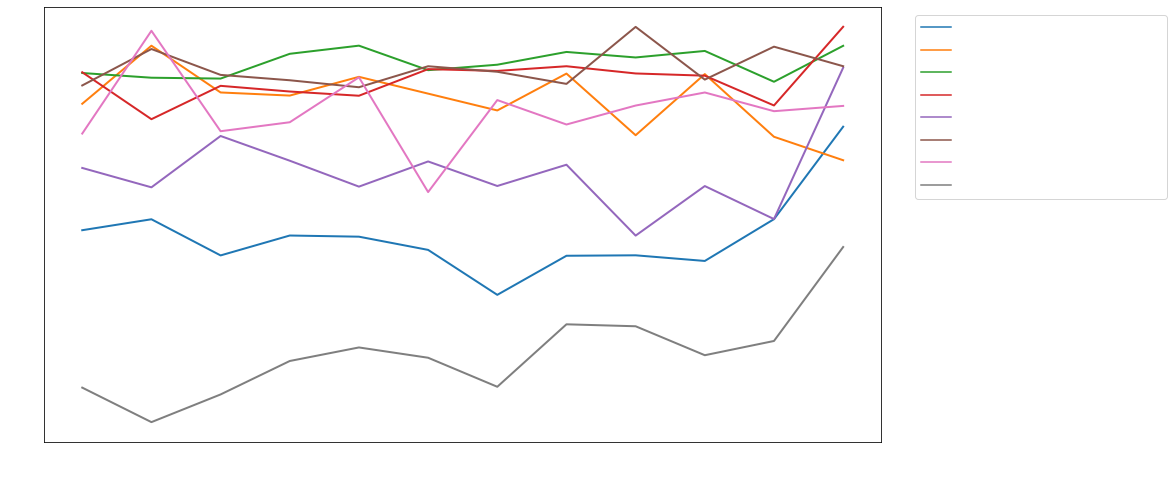

In [70]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>300).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['score'], hue=genre_filter["genres"], ci=None,linewidth = 2)
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

Top những thể loại phim được đánh giá cao từ khán giả là Drama,Romance - Drama, Comedy - Drama

## Ảnh hưởng của ngôn ngữ tới doanh thu phim là như thế nào?
- Hầu hết phim ra rạp đều có ngôn ngữ là tiếng Anh nên doanh thu của những phim tiếng Anh sẽ là lớn nhất.
- Vậy bên cạnh tiếng Anh liệu có ngôn ngữ phim nào được đón nhận hay không?

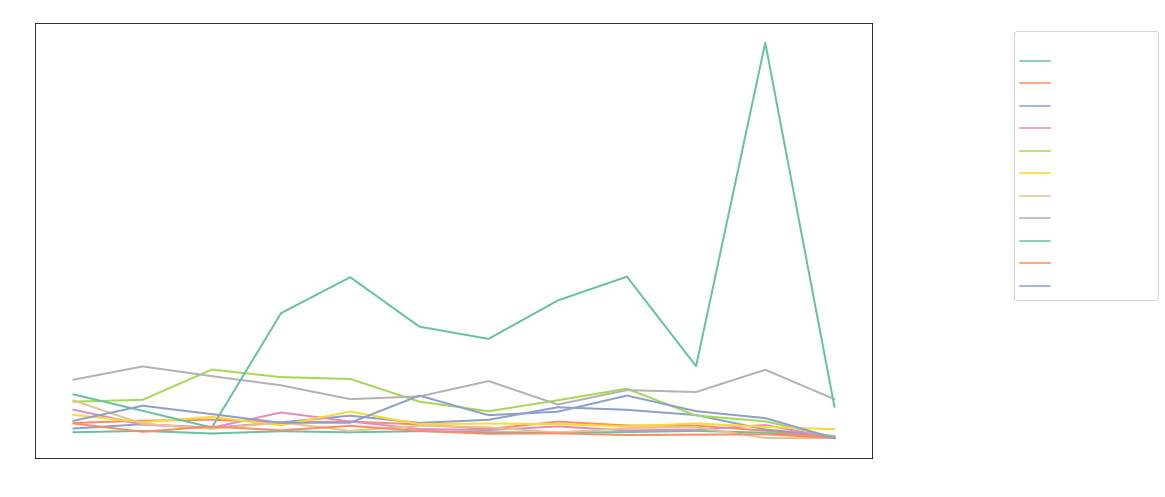

In [71]:
non_eng_movies=df[df["languages"].str.contains("English")==False]
non_eng=non_eng_movies.groupby('languages').filter(lambda x : len(x)>300).sort_values(by="release_date")

non_eng_graph=sns.lineplot(data=non_eng, x=non_eng["release_date"], y=non_eng['gross_worldwide'], hue=non_eng["languages"], ci=None,linewidth = 2, palette="Set2")
non_eng_graph.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15}, title="Language")
non_eng_graph.set(title="Gross worldwide of Non-English Films over the Years")

fig = plt.gcf()
fig.set_size_inches(15, 8)

- Phim có ngôn ngữ là tiếng Mandarin có doanh thu vượt trội so với những ngôn ngữ có 200 phim trở lên trong dataset. Lí giải cho điều này bởi Mandarin là tiếng phổ thông của Trung Quốc (hơn 900 triệu người sử dụng), việc có thêm ngôn ngữ này vào phim sẽ thu hút thêm người xem ở thị trường tỷ dân này.
- Phim có ngôn ngữ là tiếng Nhật có doanh thu cũng vượt trội theo sau. Lí giải cho điều nay có thể là do sự phát triển lớn mạnh của phim hoạt hình Nhật Bản (gần như bành trướng trong dòng phim hoạt hình).

## Một vài phim Việt có doanh thu cao

In [72]:
df[df.countries_of_origin.str.contains('Vietnam', na=False)][['title', 'directors', 'genres', 'release_date', 'gross_worldwide']].sort_values('gross_worldwide', ascending=False).head(10)

title            directors  \
20955                        Mắt Biếc           Victor Vu,   
17663                  Tiệc Trăng Máu   Quang Dung Nguyen,   
1156              Gai Gia Lam Chieu 3             Namcito,   
10200                      Hai Phuong         Le-Van Kiet,   
6960                   Cua Lại Vợ Bầu          Nhat Trung,   
2568    Chi Muoi Ba 2: 3 Ngay Sinh Tu        Vo Thanh Hoa,   
1983             Em La Ba Noi Cua Anh  Phan Gia Nhat Linh,   
19017  Tôi Thấy Hoa Vàng Trên Cỏ Xanh           Victor Vu,   
16354                   Chi Chi Em Em          Kathy Uyen,   
7523                          49 Ngày          Nhat Trung,   

                       genres  release_date  gross_worldwide  
20955          Drama,Romance,        2019.0        7061163.0  
17663           Comedy,Drama,        2020.0        6709383.0  
1156                  Comedy,        2020.0        5830719.0  
10200  Action,Drama,Thriller,        2019.0        5756185.0  
6960   Comedy,Family,Romance,        2019.0        5564332.0  
2568           Action,Comedy,        2020.0        4257126.0  
1983            Comedy,Music,        2015.0        3810429.0  
19017                  Drama,        2015.0        3293667.0  
16354         Drama,Thriller,        2019.0        2978284.0  
7523    Comedy,Drama,Romance,        2015.0        2904527.0